In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import missingno as msno
import sweetviz as sw
import dtale

In [2]:
df=pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')

In [3]:
df.head()

Unnamed: 0    vote  age  economic.cond.national  economic.cond.household  \
0           1  Labour   43                       3                        3   
1           2  Labour   36                       4                        4   
2           3  Labour   35                       4                        4   
3           4  Labour   24                       4                        2   
4           5  Labour   41                       2                        2   

   Blair  Hague  Europe  political.knowledge  gender  
0      4      1       2                    2  female  
1      4      4       5                    2    male  
2      5      2       3                    2    male  
3      2      1       4                    0  female  
4      1      1       6                    2    male

### Dropping Unnamed:0 column

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.head()

vote  age  economic.cond.national  economic.cond.household  Blair  Hague  \
0  Labour   43                       3                        3      4      1   
1  Labour   36                       4                        4      4      4   
2  Labour   35                       4                        4      5      2   
3  Labour   24                       4                        2      2      1   
4  Labour   41                       2                        2      1      1   

   Europe  political.knowledge  gender  
0       2                    2  female  
1       5                    2    male  
2       3                    2    male  
3       4                    0  female  
4       6                    2    male

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [7]:
df.isnull().sum().sum()

0

In [8]:
for i in df.columns:
    print("-------------------"+i+"-------------------")
    print(df[i].value_counts())

-------------------vote-------------------
Labour          1063
Conservative     462
Name: vote, dtype: int64
-------------------age-------------------
37    42
49    39
35    39
47    38
46    37
      ..
87     3
92     2
91     1
90     1
93     1
Name: age, Length: 70, dtype: int64
-------------------economic.cond.national-------------------
3    607
4    542
2    257
5     82
1     37
Name: economic.cond.national, dtype: int64
-------------------economic.cond.household-------------------
3    648
4    440
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64
-------------------Blair-------------------
4    836
2    438
5    153
1     97
3      1
Name: Blair, dtype: int64
-------------------Hague-------------------
2    624
4    558
1    233
5     73
3     37
Name: Hague, dtype: int64
-------------------Europe-------------------
11    338
6     209
3     129
4     127
5     124
8     112
9     111
1     109
10    101
7      86
2      79
Name: Europe, dtype: int64
-

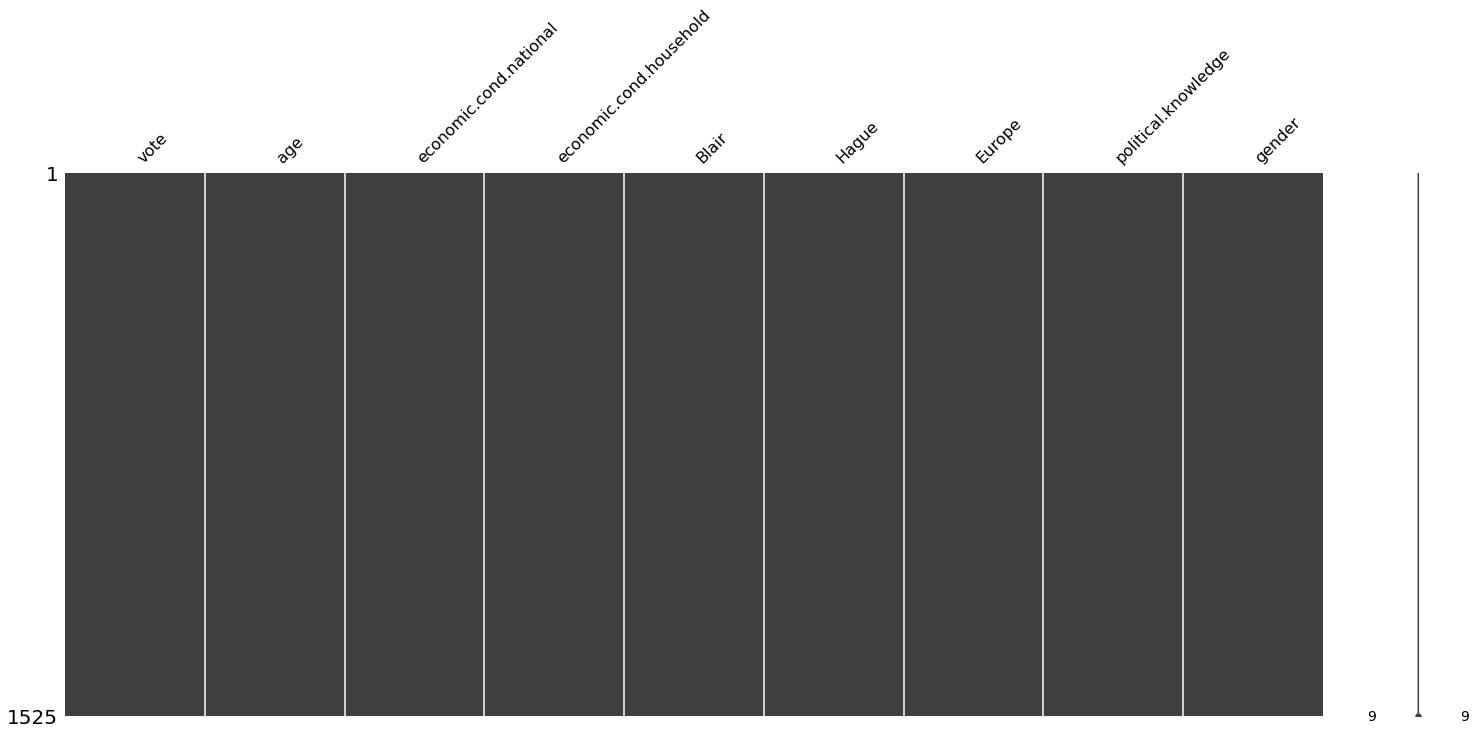

In [9]:
msno.matrix(df)

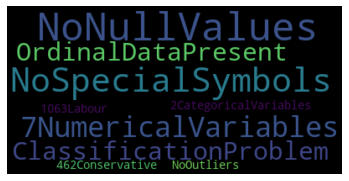

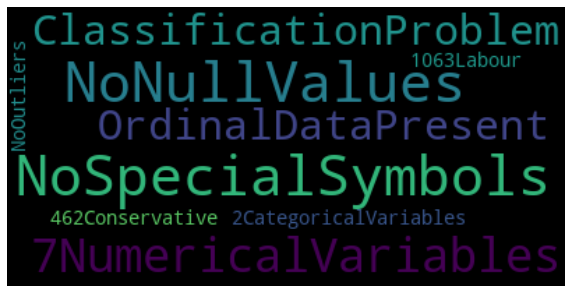

In [10]:
import os

from os import path
from wordcloud import WordCloud

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = open(path.join(d, 'sampleWords.txt')).read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# The pil way (if you don't have matplotlib)
# image = wordcloud.to_image()
# image.show()

In [11]:
df.describe(include='all')

vote          age  economic.cond.national  economic.cond.household  \
count     1525  1525.000000             1525.000000              1525.000000   
unique       2          NaN                     NaN                      NaN   
top     Labour          NaN                     NaN                      NaN   
freq      1063          NaN                     NaN                      NaN   
mean       NaN    54.182295                3.245902                 3.140328   
std        NaN    15.711209                0.880969                 0.929951   
min        NaN    24.000000                1.000000                 1.000000   
25%        NaN    41.000000                3.000000                 3.000000   
50%        NaN    53.000000                3.000000                 3.000000   
75%        NaN    67.000000                4.000000                 4.000000   
max        NaN    93.000000                5.000000                 5.000000   

              Blair        Hague       Europe  political.knowledge  gender  
count   1525.000000  1525.000000  1525.000000          1525.000000    1525  
unique          NaN          NaN          NaN                  NaN       2  
top             NaN          NaN          NaN                  NaN  female  
freq            NaN          NaN          NaN                  NaN     812  
mean       3.334426     2.746885     6.728525             1.542295     NaN  
std        1.174824     1.230703     3.297538             1.083315     NaN  
min        1.000000     1.000000     1.000000             0.000000     NaN  
25%        2.000000     2.000000     4.000000             0.000000     NaN  
50%        4.000000     2.000000     6.000000             2.000000     NaN  
75%        4.000000     4.000000    10.000000             2.000000     NaN  
max        5.000000     5.000000    11.000000             3.000000     NaN

### Finding Duplicates

In [12]:
df[df.duplicated(keep=False,)]

vote  age  economic.cond.national  economic.cond.household  \
2           Labour   35                       4                        4   
67          Labour   35                       4                        4   
86    Conservative   53                       3                        4   
333         Labour   38                       2                        4   
390         Labour   39                       3                        4   
577   Conservative   74                       4                        3   
626         Labour   39                       3                        4   
870         Labour   38                       2                        4   
916         Labour   29                       4                        4   
983   Conservative   74                       4                        3   
1037        Labour   40                       4                        3   
1154  Conservative   53                       3                        4   
1209        Labour   36                       3                        3   
1236        Labour   36                       3                        3   
1244        Labour   29                       4                        4   
1438        Labour   40                       4                        3   

      Blair  Hague  Europe  political.knowledge  gender  
2         5      2       3                    2    male  
67        5      2       3                    2    male  
86        2      2       6                    0  female  
333       2      2       4                    3    male  
390       4      2       5                    2    male  
577       2      4       8                    2  female  
626       4      2       5                    2    male  
870       2      2       4                    3    male  
916       4      2       2                    2  female  
983       2      4       8                    2  female  
1037      4      2       2                    2    male  
1154      2      2       6                    0  female  
1209      2      2       6                    2  female  
1236      2      2       6                    2  female  
1244      4      2       2                    2  female  
1438      4      2       2                    2    male

### Dropping duplicates, as they would not add any value during modeling phase

In [13]:
df.shape

(1525, 9)

In [14]:
df=df.drop_duplicates(keep='first')
df.shape

(1517, 9)

## Checking Skewness in Data

### Checking skewness for age variable as that is the only continous variable

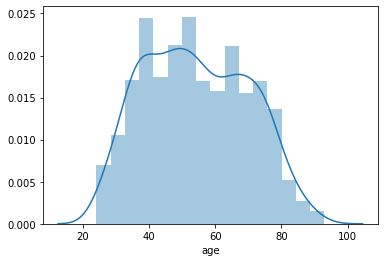

In [15]:
sns.distplot(df['age'])

In [16]:
import scipy.stats as stats
pd.DataFrame(stats.skew(df['age']),index=['age'],columns=['Amount of Skewness'])

Amount of Skewness
age            0.139662

## Univariate Analysis

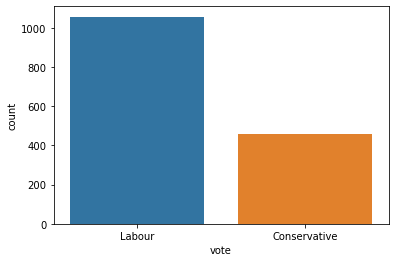

In [17]:
sns.countplot(df.vote)

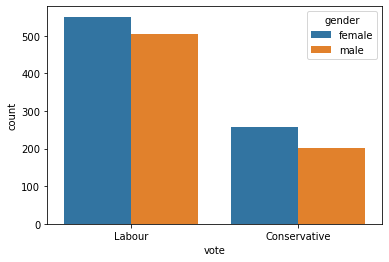

In [18]:
sns.countplot(df.vote,hue=df.gender)

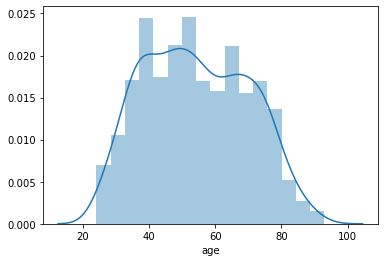

In [19]:
sns.distplot(df.age)

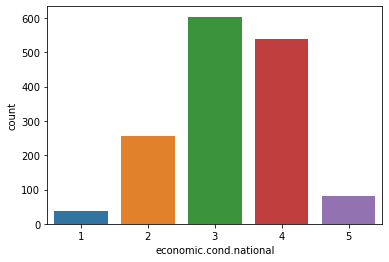

In [20]:
sns.countplot(df['economic.cond.national'])

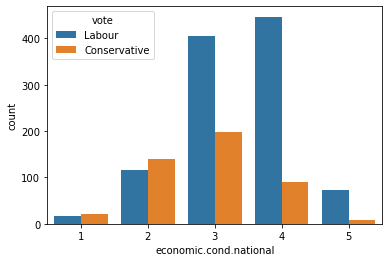

In [21]:
sns.countplot(df['economic.cond.national'],hue=df.vote)

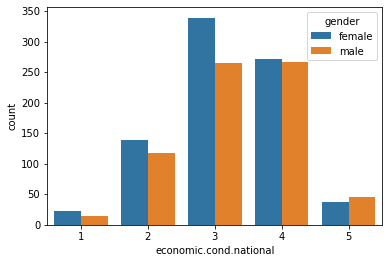

In [22]:
sns.countplot(df['economic.cond.national'],hue=df.gender)

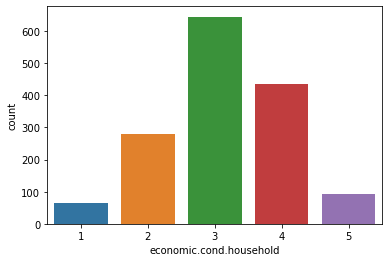

In [23]:
sns.countplot(df['economic.cond.household'])

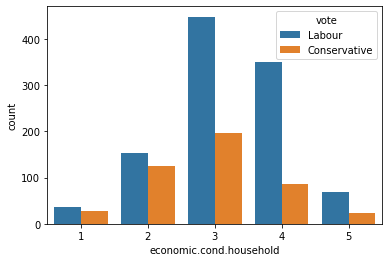

In [24]:
sns.countplot(df['economic.cond.household'],hue=df.vote)

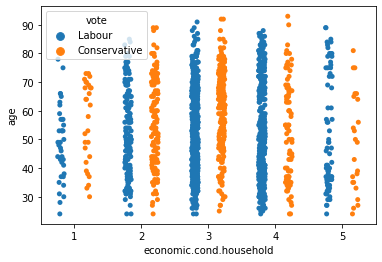

In [25]:
sns.stripplot(x ='economic.cond.household', y ='age', data = df, jitter = True, hue ='vote', dodge = True)

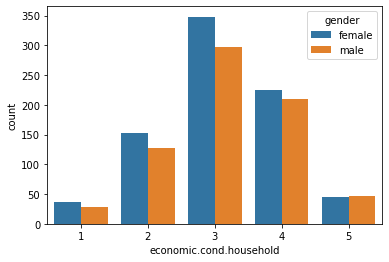

In [26]:
sns.countplot(df['economic.cond.household'],hue=df.gender)

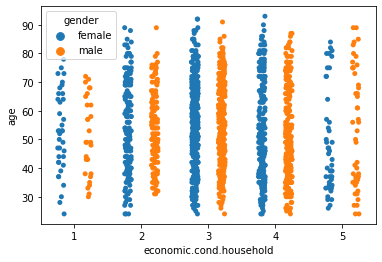

In [27]:
sns.stripplot(x ='economic.cond.household', y ='age', data = df, jitter = True, hue ='gender', dodge = True)

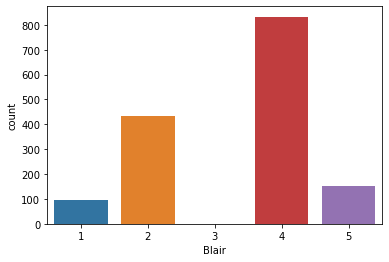

In [28]:
sns.countplot(df.Blair)

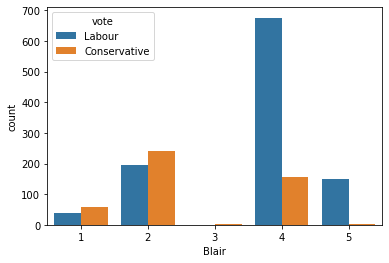

In [29]:
sns.countplot(df.Blair,hue=df.vote)

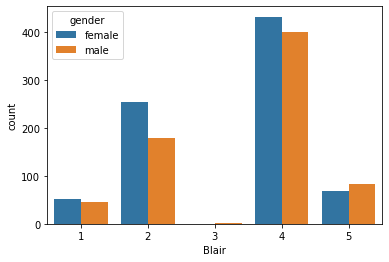

In [30]:
sns.countplot(df.Blair,hue=df.gender)

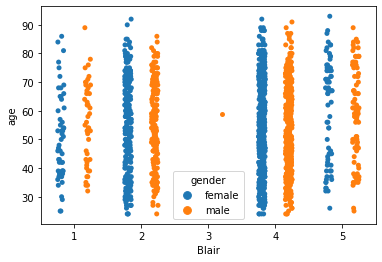

In [31]:
sns.stripplot(x ='Blair', y ='age', data = df, jitter = True, hue ='gender', dodge = True)

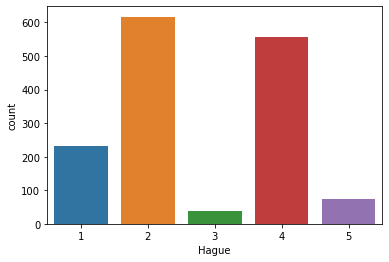

In [32]:
sns.countplot(df.Hague)

In [33]:
sns.countplot(df.Hague,hue=df.vote)

In [34]:
sns.countplot(df.Hague,hue=df.gender)

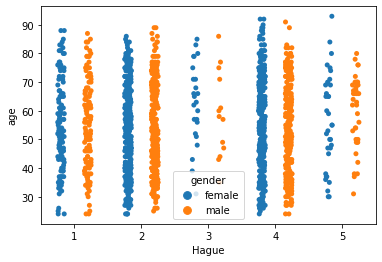

In [35]:
sns.stripplot(x ='Hague', y ='age', data = df, jitter = True, hue ='gender', dodge = True)

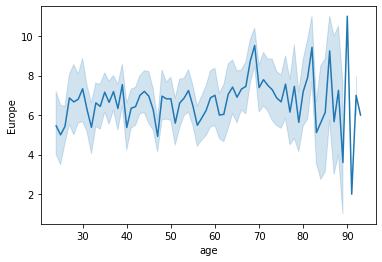

In [36]:
sns.lineplot(y=df['Europe'],x=df['age'])

In [37]:
sns.countplot(df.Europe)

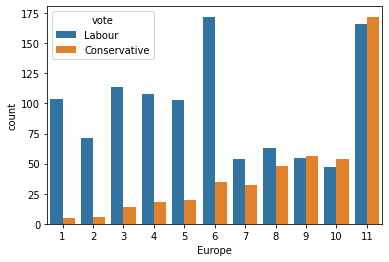

In [38]:
sns.countplot(df.Europe,hue=df.vote)

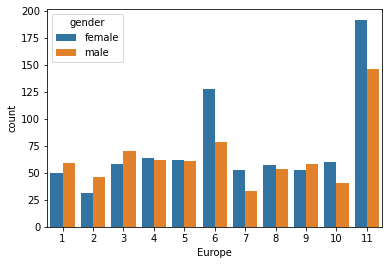

In [39]:
sns.countplot(df.Europe,hue=df.gender)

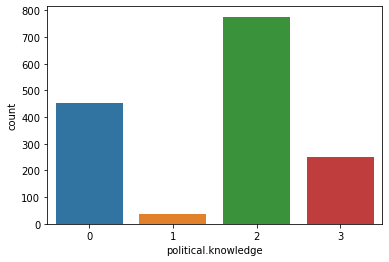

In [40]:
sns.countplot(df['political.knowledge'])

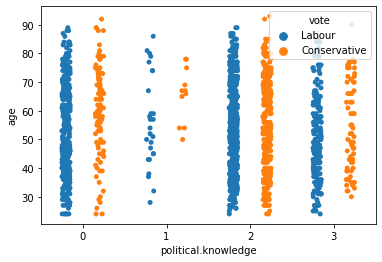

In [41]:
sns.stripplot(x ='political.knowledge', y ='age', data = df, jitter = True, hue ='vote', dodge = True)

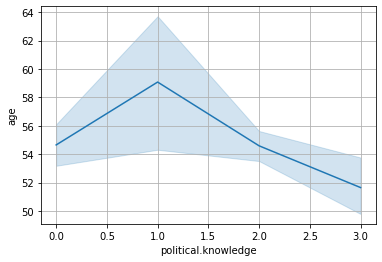

In [42]:
plt.grid()
sns.lineplot(x=df['political.knowledge'],y=df['age'])

In [43]:
sns.countplot(df['political.knowledge'],hue=df['vote'])

In [44]:
sns.countplot(df['political.knowledge'],hue=df['gender'])

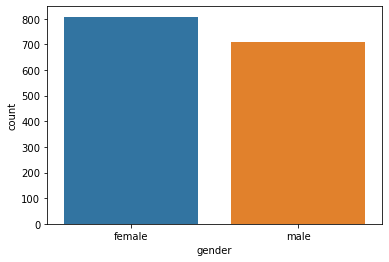

In [45]:
sns.countplot(df['gender'])

In [46]:
sns.countplot(df['gender'],hue=df['vote'])

## BiVariate Analysis

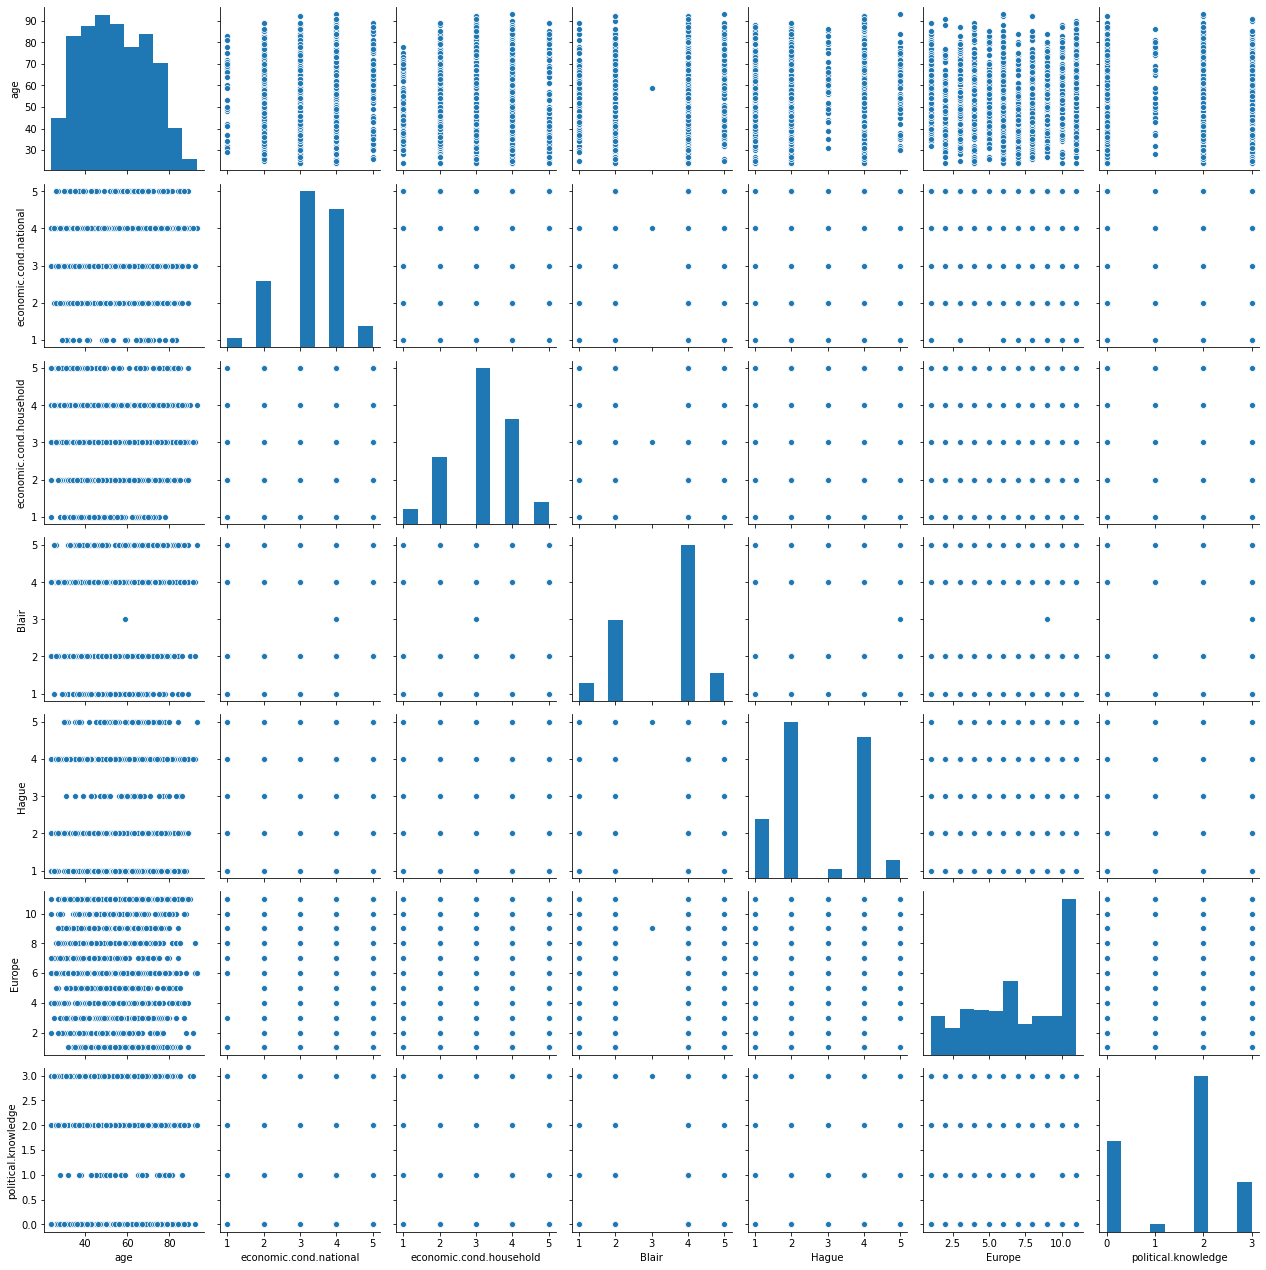

In [47]:
sns.pairplot(df)

## No Outliers present

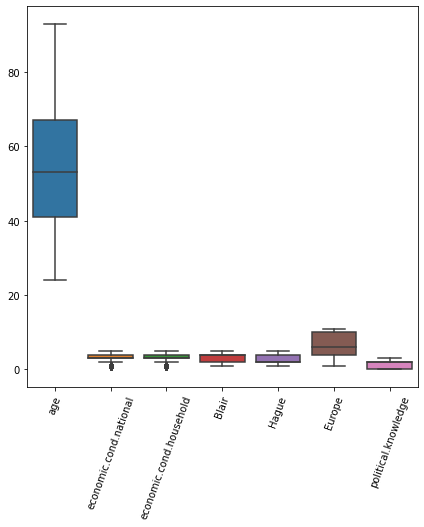

In [48]:
plt.figure(figsize=(7,7))
plt.xticks(rotation=70)
sns.boxplot(data=df)

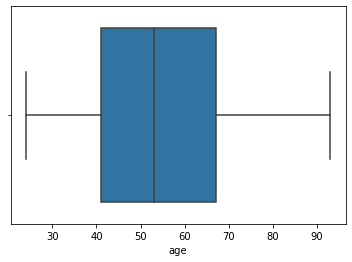

In [49]:
sns.boxplot(df['age'])

## Age is the only logical column for which outlier analysis need to be done, however none is present

In [50]:
outlier_list=[]
q1,q3=np.percentile(df['age'],[25,75])
q1,q3
iqr=q3-q1
iqr
lower=q1-(1.5*iqr)
upper=q3+(1.5*iqr)
upper,lower
for i in df['age']:
    if i < lower or i > upper:
        outlier_list.append(i)
print("Outliers: {}".format(outlier_list))
print("Outlier Count: {}".format(len(outlier_list)))

Outliers: []
Outlier Count: 0


In [51]:
df.head()

vote  age  economic.cond.national  economic.cond.household  Blair  Hague  \
0  Labour   43                       3                        3      4      1   
1  Labour   36                       4                        4      4      4   
2  Labour   35                       4                        4      5      2   
3  Labour   24                       4                        2      2      1   
4  Labour   41                       2                        2      1      1   

   Europe  political.knowledge  gender  
0       2                    2  female  
1       5                    2    male  
2       3                    2    male  
3       4                    0  female  
4       6                    2    male

## BiVariate Analysis

In [52]:
dtale.show(df)

## Check Multicollinearity

2020-10-04 19:51:57,088 - INFO     - NumExpr defaulting to 4 threads.


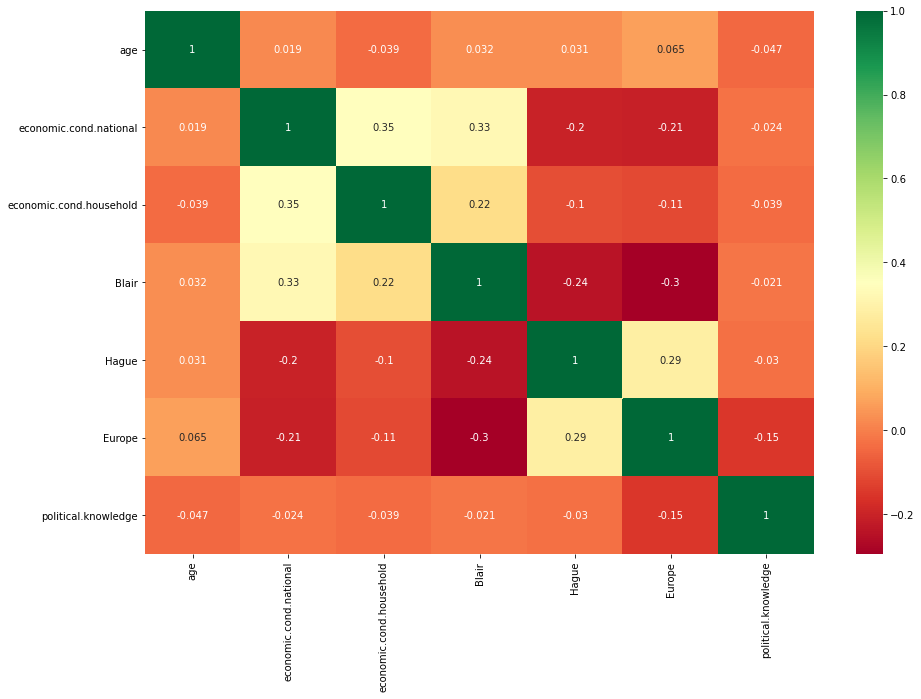

In [53]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

<Figure size 1080x720 with 0 Axes>

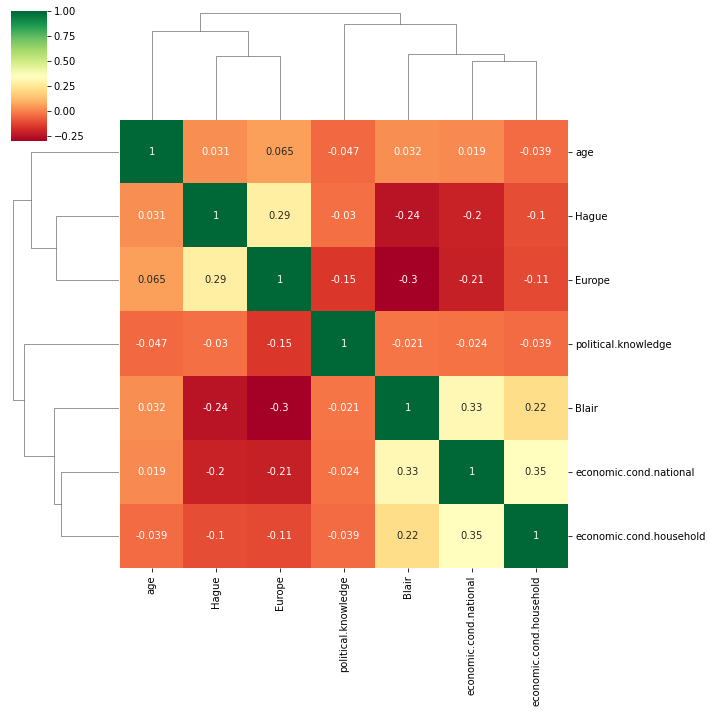

In [54]:
plt.figure(figsize=(15,10))
sns.clustermap(df.corr(),annot=True,cmap='RdYlGn')

In [55]:
df.head()

vote  age  economic.cond.national  economic.cond.household  Blair  Hague  \
0  Labour   43                       3                        3      4      1   
1  Labour   36                       4                        4      4      4   
2  Labour   35                       4                        4      5      2   
3  Labour   24                       4                        2      2      1   
4  Labour   41                       2                        2      1      1   

   Europe  political.knowledge  gender  
0       2                    2  female  
1       5                    2    male  
2       3                    2    male  
3       4                    0  female  
4       6                    2    male

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
le = LabelEncoder()

In [58]:
df_org=df.copy()

In [59]:
df.vote=le.fit_transform(df.vote)

In [60]:
df.gender=le.fit_transform(df.gender)

In [61]:
df.head()

vote  age  economic.cond.national  economic.cond.household  Blair  Hague  \
0     1   43                       3                        3      4      1   
1     1   36                       4                        4      4      4   
2     1   35                       4                        4      5      2   
3     1   24                       4                        2      2      1   
4     1   41                       2                        2      1      1   

   Europe  political.knowledge  gender  
0       2                    2       0  
1       5                    2       1  
2       3                    2       1  
3       4                    0       0  
4       6                    2       1

## Train Test Split

In [62]:
X=df.drop('vote',axis=1)
y=df.pop('vote')

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)

In [64]:
X_train

age  economic.cond.national  economic.cond.household  Blair  Hague  \
533    71                       3                        3      4      2   
708    57                       4                        5      4      1   
1144   24                       3                        4      2      4   
1081   43                       4                        4      2      3   
957    37                       3                        2      4      2   
...   ...                     ...                      ...    ...    ...   
513    80                       2                        2      2      4   
827    27                       3                        3      2      4   
349    56                       4                        2      5      2   
1248   75                       4                        3      4      5   
1141   43                       2                        3      2      3   

      Europe  political.knowledge  gender  
533       11                    0       0  
708        3                    2       0  
1144      11                    0       1  
1081       5                    0       1  
957        7                    2       1  
...      ...                  ...     ...  
513        7                    2       1  
827        5                    2       0  
349        1                    2       0  
1248       7                    3       0  
1141      11                    2       0  

[1061 rows x 8 columns]

## Making 3 DataFrames - All Unscaled, All Scaled, Age Scaled

In [65]:
X_train_all_unscaled = X_train.copy()
X_test_all_unscaled=X_test.copy()
y_train_all_unscaled=y_train.copy()
y_test_all_unscaled=y_test.copy()

In [66]:
X_train_all_scaled = X_train.copy()
X_test_all_scaled=X_test.copy()
y_train_all_scaled=y_train.copy()
y_test_all_scaled=y_test.copy()

In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [68]:
X_train_all_scaled=sc.fit_transform(X_train_all_scaled)
X_test_all_scaled=sc.transform(X_test_all_scaled)

In [69]:
X_train_all_scaled=pd.DataFrame(X_train_all_scaled,
                                columns=X_train_all_unscaled.columns,index=X_train_all_unscaled.index)
X_test_all_scaled=pd.DataFrame(X_test_all_scaled,
                               columns=X_test_all_unscaled.columns,index=X_test_all_unscaled.index)

In [70]:
X_train_age_scaled = X_train.copy()
X_test_age_scaled=X_test.copy()
y_train_age_scaled=y_train.copy()
y_test_age_scaled=y_test.copy()

In [71]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [72]:
X_train_age_scaled['age']=sc.fit_transform(np.array(X_train_age_scaled['age']).reshape(-1,1))
X_test_age_scaled['age']=sc.transform(np.array(X_test_age_scaled['age']).reshape(-1,1))

In [73]:
metrics_df_lst=[]

# Logistic Regression

## Using Logit function from statsmodel library to get the coefficients for better understanding

In [74]:
import statsmodels.api as sm 

## All Unscaled

In [75]:
log_reg_all_unscaled = sm.Logit(y_train_all_unscaled,X_train_all_unscaled).fit() 

Optimization terminated successfully.
         Current function value: 0.410914
         Iterations 7


In [76]:
print(log_reg_all_unscaled.summary())

                           Logit Regression Results                           
Dep. Variable:                   vote   No. Observations:                 1061
Model:                          Logit   Df Residuals:                     1053
Method:                           MLE   Df Model:                            7
Date:                Sun, 04 Oct 2020   Pseudo R-squ.:                  0.3305
Time:                        19:51:58   Log-Likelihood:                -435.98
converged:                       True   LL-Null:                       -651.23
Covariance Type:            nonrobust   LLR p-value:                 6.809e-89
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                      3.577e-05      0.005      0.007      0.994      -0.010       0.010
economic.cond.national      0.5541      0.101      5.479      0.000       0.356       0.752


In [77]:
dct=(pd.Series(log_reg_all_unscaled.params)).to_dict()
lst=sorted(dct.items(), key = 
             lambda kv:(kv[1], kv[0]))
def Convert(tup, di): 
    di = dict(tup) 
    return di 
d={}
d=Convert(lst,d)

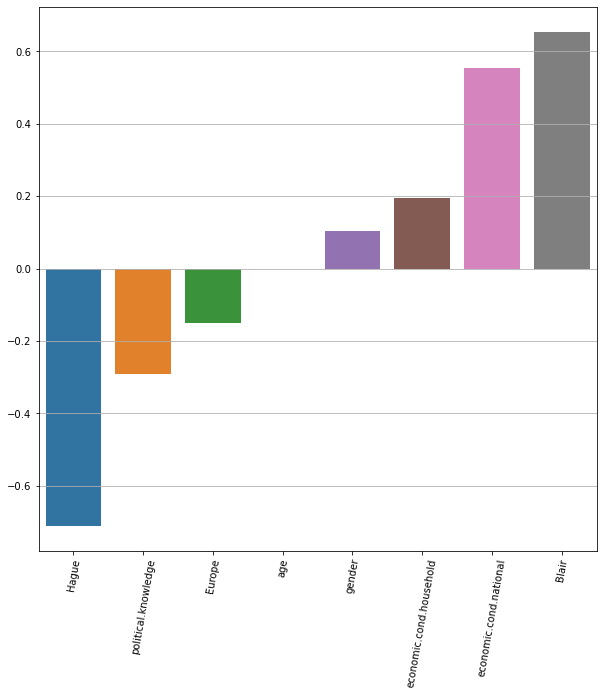

In [78]:
keys = list(d.keys())
# get values in the same order as keys, and parse percentage values
vals = [float(d[k]) for k in keys]
plt.figure(figsize=(10,10))
plt.grid()
plt.xticks(rotation=80)
sns.barplot(x=keys, y=vals)

In [79]:
df_org.head()

vote  age  economic.cond.national  economic.cond.household  Blair  Hague  \
0  Labour   43                       3                        3      4      1   
1  Labour   36                       4                        4      4      4   
2  Labour   35                       4                        4      5      2   
3  Labour   24                       4                        2      2      1   
4  Labour   41                       2                        2      1      1   

   Europe  political.knowledge  gender  
0       2                    2  female  
1       5                    2    male  
2       3                    2    male  
3       4                    0  female  
4       6                    2    male

In [80]:
df.head()

age  economic.cond.national  economic.cond.household  Blair  Hague  Europe  \
0   43                       3                        3      4      1       2   
1   36                       4                        4      4      4       5   
2   35                       4                        4      5      2       3   
3   24                       4                        2      2      1       4   
4   41                       2                        2      1      1       6   

   political.knowledge  gender  
0                    2       0  
1                    2       1  
2                    2       1  
3                    0       0  
4                    2       1

## All Scaled

In [81]:
X_train_all_scaled

age  economic.cond.national  economic.cond.household     Blair  \
533   1.078284               -0.274403                -0.137087  0.557983   
708   0.181786                0.858443                 1.986262  0.557983   
1144 -1.931388               -0.274403                 0.924587 -1.180695   
1081 -0.714712                0.858443                 0.924587 -1.180695   
957  -1.098925               -0.274403                -1.198761  0.557983   
...        ...                     ...                      ...       ...   
513   1.654605               -1.407249                -1.198761 -1.180695   
827  -1.739281               -0.274403                -0.137087 -1.180695   
349   0.117751                0.858443                -1.198761  1.427322   
1248  1.334427                0.858443                -0.137087  0.557983   
1141 -0.714712               -1.407249                -0.137087 -1.180695   

         Hague    Europe  political.knowledge    gender  
533  -0.625062  1.316728            -1.417763 -0.917613  
708  -1.441798 -1.148833             0.422294 -0.917613  
1144  1.008412  1.316728            -1.417763  1.089784  
1081  0.191675 -0.532443            -1.417763  1.089784  
957  -0.625062  0.083948             0.422294  1.089784  
...        ...       ...                  ...       ...  
513   1.008412  0.083948             0.422294  1.089784  
827   1.008412 -0.532443             0.422294 -0.917613  
349  -0.625062 -1.765223             0.422294 -0.917613  
1248  1.825149  0.083948             1.342323 -0.917613  
1141  0.191675  1.316728             0.422294 -0.917613  

[1061 rows x 8 columns]

In [82]:
log_reg_all_scaled = sm.Logit(y_train_all_scaled, X_train_all_scaled).fit() 

Optimization terminated successfully.
         Current function value: 0.508859
         Iterations 6


In [83]:
print(log_reg_all_scaled.summary())

                           Logit Regression Results                           
Dep. Variable:                   vote   No. Observations:                 1061
Model:                          Logit   Df Residuals:                     1053
Method:                           MLE   Df Model:                            7
Date:                Sun, 04 Oct 2020   Pseudo R-squ.:                  0.1710
Time:                        19:51:59   Log-Likelihood:                -539.90
converged:                       True   LL-Null:                       -651.23
Covariance Type:            nonrobust   LLR p-value:                 1.795e-44
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                        -0.1994      0.076     -2.618      0.009      -0.349      -0.050
economic.cond.national      0.2329      0.086      2.717      0.007       0.065       0.401


In [84]:
dct=(pd.Series(log_reg_all_scaled.params)).to_dict()
lst=sorted(dct.items(), key = 
             lambda kv:(kv[1], kv[0]))
def Convert(tup, di): 
    di = dict(tup) 
    return di 
d={}
d=Convert(lst,d)

In [85]:
keys = list(d.keys())
# get values in the same order as keys, and parse percentage values
vals = [float(d[k]) for k in keys]
plt.figure(figsize=(10,10))
plt.grid()
plt.xticks(rotation=80)
sns.barplot(x=keys, y=vals)

## Age Scaled

In [86]:
X_train_age_scaled

age  economic.cond.national  economic.cond.household  Blair  Hague  \
533   1.078284                       3                        3      4      2   
708   0.181786                       4                        5      4      1   
1144 -1.931388                       3                        4      2      4   
1081 -0.714712                       4                        4      2      3   
957  -1.098925                       3                        2      4      2   
...        ...                     ...                      ...    ...    ...   
513   1.654605                       2                        2      2      4   
827  -1.739281                       3                        3      2      4   
349   0.117751                       4                        2      5      2   
1248  1.334427                       4                        3      4      5   
1141 -0.714712                       2                        3      2      3   

      Europe  political.knowledge  gender  
533       11                    0       0  
708        3                    2       0  
1144      11                    0       1  
1081       5                    0       1  
957        7                    2       1  
...      ...                  ...     ...  
513        7                    2       1  
827        5                    2       0  
349        1                    2       0  
1248       7                    3       0  
1141      11                    2       0  

[1061 rows x 8 columns]

In [87]:
log_reg_age_scaled = sm.Logit(y_train_age_scaled, X_train_age_scaled).fit()

Optimization terminated successfully.
         Current function value: 0.407546
         Iterations 7


In [88]:
print(log_reg_age_scaled.summary())

                           Logit Regression Results                           
Dep. Variable:                   vote   No. Observations:                 1061
Model:                          Logit   Df Residuals:                     1053
Method:                           MLE   Df Model:                            7
Date:                Sun, 04 Oct 2020   Pseudo R-squ.:                  0.3360
Time:                        19:51:59   Log-Likelihood:                -432.41
converged:                       True   LL-Null:                       -651.23
Covariance Type:            nonrobust   LLR p-value:                 1.991e-90
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                        -0.2296      0.086     -2.662      0.008      -0.399      -0.061
economic.cond.national      0.5595      0.099      5.636      0.000       0.365       0.754


In [89]:
dct=(pd.Series(log_reg_age_scaled.params)).to_dict()
lst=sorted(dct.items(), key = 
             lambda kv:(kv[1], kv[0]))
def Convert(tup, di): 
    di = dict(tup) 
    return di 
d={}
d=Convert(lst,d)

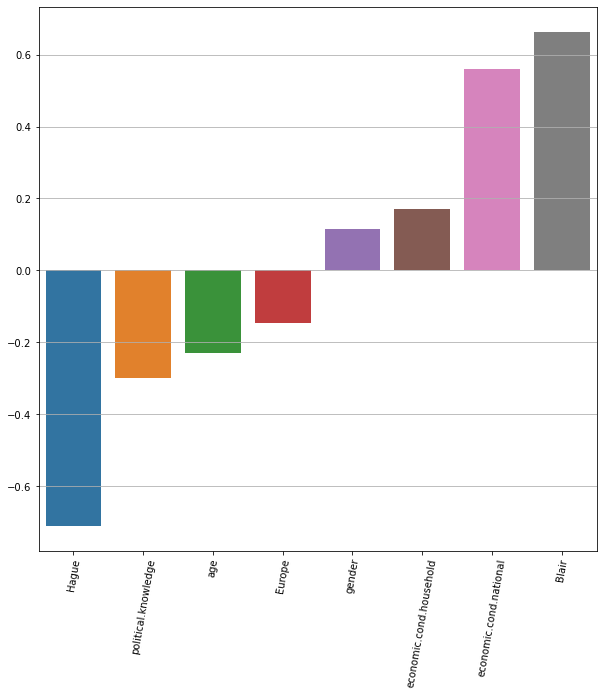

In [90]:
keys = list(d.keys())
# get values in the same order as keys, and parse percentage values
vals = [float(d[k]) for k in keys]
plt.figure(figsize=(10,10))
plt.grid()
plt.xticks(rotation=80)
sns.barplot(x=keys, y=vals)

## Generic Function to apply and evaluate different ML Models

In [91]:
def apply_evl(name,model,param_grid,X_train,X_test,y_train,y_test):
    test_metrics_dict={}
    train_metrics_dict={}
    from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
    from sklearn.model_selection import GridSearchCV
    print(name)
    if param_grid!=None:    
        grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3,n_jobs=4)
        gs=grid_search.fit(X_train,y_train)
        print("--------------------Best Parameters--------------------")
        print(gs.best_params_)
        best_model=gs.best_estimator_
        print()
        print()
        print("--------------------Best Model Params--------------------")
        print(best_model)
        print()
        print()
        ytrain_predict = best_model.predict(X_train)
        ytest_predict = best_model.predict(X_test)
    elif param_grid == None:
        best_model=model
        best_model.fit(X_train,y_train)
        ytrain_predict = best_model.predict(X_train)
        ytest_predict = best_model.predict(X_test)
    
    print("Train Accuracy Score for model {} is {}".format(model,accuracy_score(y_train,ytrain_predict)))
    print()
    print()
    print("--------------------Classification Report - Train Data--------------------")
    print(classification_report(y_train,ytrain_predict))
    print("------------------------------------------------------------")
    print()
    print()
    sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',
            cbar=False,cmap='YlGnBu')
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.title('Confusion Matrix - Train Data')
    plt.show()
    print()
    print()
    print("------------------------------------------------------------")
    
        # AUC and ROC for the training data

    # predict probabilities
    probs = best_model.predict_proba(X_train)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    from sklearn.metrics import roc_auc_score
    auc = roc_auc_score(y_train, probs)
    print('AUC: %.3f' % auc)
    # calculate roc curve
    from sklearn.metrics import roc_curve
    fpr, tpr, thresholds = roc_curve(y_train, probs)
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    plt.title('Train Data - ROC Curve')
    # show the plot
    plt.show()
    print()
    print()
    print("------------------------------------------------------------")
    
        
#     train_metrics_dict.update({"Accuracy":accuracy_score(y_train,ytrain_predict)})
#     train_metrics_dict.update({"Precision":precision_score(y_train,ytrain_predict)})
#     train_metrics_dict.update({"Recall":recall_score(y_train,ytrain_predict)})
#     train_metrics_dict.update({"F1":f1_score(y_train,ytrain_predict)})
#     train_metrics_dict.update({"AUC":roc_auc_score(y_train,probs)})
#     train_metrics_df=pd.DataFrame(train_metrics_dict,index=[name+"_Train"]).T

    train_metrics_dict.update({name+"_Train":[accuracy_score(y_train,ytrain_predict),precision_score(y_train,ytrain_predict),
                                                recall_score(y_train,ytrain_predict),f1_score(y_train,ytrain_predict),
                                                roc_auc_score(y_train,probs)]})
    train_metrics_df=pd.DataFrame(train_metrics_dict,index=['Accuracy','Precision','Recall','F1','AUC'])
    
    
    print()
    print()
    
    print("Test Accuracy Score for model {} is {}".format(model,accuracy_score(y_test,ytest_predict)))
    print()
    print()
    print("--------------------Classification Report - Test Data--------------------")
    print(classification_report(y_test,ytest_predict))
    print("------------------------------------------------------------")
    print()
    print()
    sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',
            cbar=False,cmap='YlGnBu')
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.title('Confusion Matrix - Test Data')
    plt.show()
    print()
    print()
    print("------------------------------------------------------------")
    
        # AUC and ROC for the training data

    # predict probabilities
    probs = best_model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    from sklearn.metrics import roc_auc_score
    auc = roc_auc_score(y_test, probs)
    print('AUC: %.3f' % auc)
    # calculate roc curve
    from sklearn.metrics import roc_curve
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    plt.title('Test Data - ROC Curve')
    # show the plot
    plt.show()
    print()
    print()
    print("------------------------------------------------------------")
       
    
    test_metrics_dict.update({name+"_Test":[accuracy_score(y_test,ytest_predict),precision_score(y_test,ytest_predict),
                                            recall_score(y_test,ytest_predict),f1_score(y_test,ytest_predict),
                                            roc_auc_score(y_test,probs)]})
    test_metrics_df=pd.DataFrame(test_metrics_dict,index=['Accuracy','Precision','Recall','F1','AUC'])
    return pd.concat([train_metrics_df,test_metrics_df],axis=1),best_model

## Applying Logistic regression using sklearn

## Param Grids for GridSearchCV
## Grids shown in the notebook are the final Grids, which have been optimized by running GSCV multiple times

In [92]:
param_grid_lr={'penalty':['l1','l2', 'elasticnet', 'none'],
      'solver':['sag','lbfgs','liblinear','newton-cg','saga'],
      'tol':[0.0001,0.00001,0.000001,0.0000001,0.00000001],
      'max_iter':[100,200,300],
               'random_state':[0,1,21,23]}

## All Unscaled

LogisticRegression_All_Unscaled
--------------------Best Parameters--------------------
{'max_iter': 100, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear', 'tol': 1e-05}


--------------------Best Model Params--------------------
LogisticRegression(penalty='l1', random_state=0, solver='liblinear', tol=1e-05)


Train Accuracy Score for model LogisticRegression() is 0.8265786993402451


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.74      0.66      0.70       322
           1       0.86      0.90      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.82      1061

------------------------------------------------------------




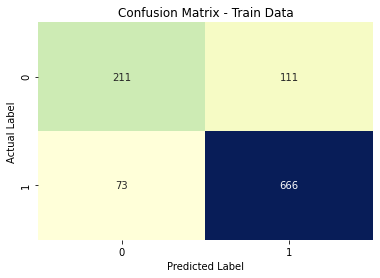



------------------------------------------------------------
AUC: 0.877


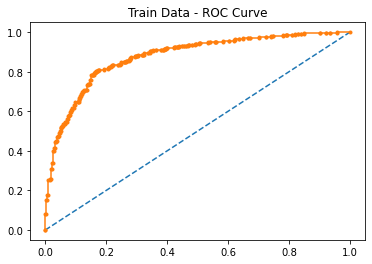



------------------------------------------------------------


Test Accuracy Score for model LogisticRegression() is 0.8574561403508771


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.82      0.68      0.74       138
           1       0.87      0.93      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.86      0.85       456

------------------------------------------------------------




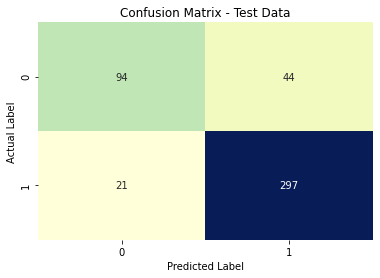



------------------------------------------------------------
AUC: 0.913


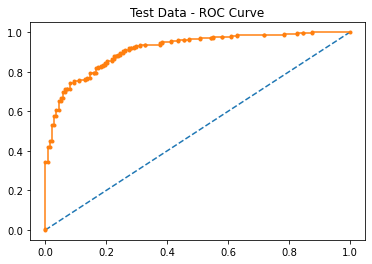



------------------------------------------------------------


In [95]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_all_unscaled_metrics_df,best_model_lr=apply_evl("LogisticRegression_All_Unscaled",lr,param_grid_lr,
                                     X_train_all_unscaled,X_test_all_unscaled,y_train_all_unscaled,y_test_all_unscaled)

In [96]:
lr_all_unscaled_metrics_df

LogisticRegression_All_Unscaled_Train  \
Accuracy                                0.826579   
Precision                               0.857143   
Recall                                  0.901218   
F1                                      0.878628   
AUC                                     0.877176   

           LogisticRegression_All_Unscaled_Test  
Accuracy                               0.857456  
Precision                              0.870968  
Recall                                 0.933962  
F1                                     0.901366  
AUC                                    0.913408

In [97]:
metrics_df_lst.append(lr_all_unscaled_metrics_df)

## All Scaled

LogisticRegression_All_Scaled
--------------------Best Parameters--------------------
{'max_iter': 100, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear', 'tol': 0.0001}


--------------------Best Model Params--------------------
LogisticRegression(penalty='l1', random_state=0, solver='liblinear')


Train Accuracy Score for model LogisticRegression() is 0.8265786993402451


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.74      0.66      0.70       322
           1       0.86      0.90      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.82      1061

------------------------------------------------------------




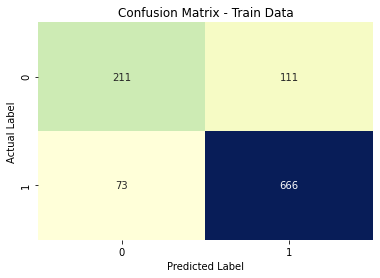



------------------------------------------------------------
AUC: 0.877




------------------------------------------------------------


Test Accuracy Score for model LogisticRegression() is 0.8552631578947368


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.81      0.68      0.74       138
           1       0.87      0.93      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.86      0.85       456

------------------------------------------------------------




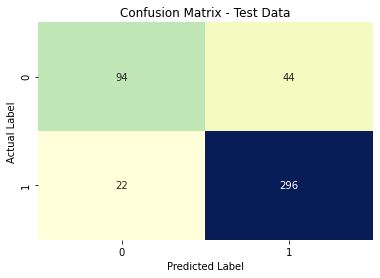



------------------------------------------------------------
AUC: 0.912


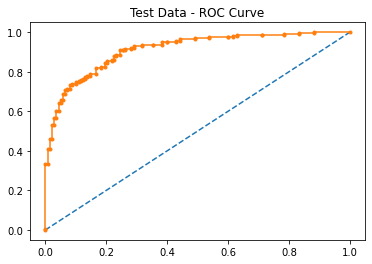



------------------------------------------------------------


In [98]:
lr = LogisticRegression()
lr_all_scaled_metrics_df,best_model_lr=apply_evl("LogisticRegression_All_Scaled",lr,param_grid_lr,
                                                 X_train_all_scaled,X_test_all_scaled,
          y_train_all_scaled,y_test_all_scaled)

In [99]:
lr_all_scaled_metrics_df

LogisticRegression_All_Scaled_Train  \
Accuracy                              0.826579   
Precision                             0.857143   
Recall                                0.901218   
F1                                    0.878628   
AUC                                   0.877130   

           LogisticRegression_All_Scaled_Test  
Accuracy                             0.855263  
Precision                            0.870588  
Recall                               0.930818  
F1                                   0.899696  
AUC                                  0.912497

In [100]:
metrics_df_lst.append(lr_all_scaled_metrics_df)

## Age Scaled

LogisticRegression_Age_Scaled
--------------------Best Parameters--------------------
{'max_iter': 200, 'penalty': 'l1', 'random_state': 0, 'solver': 'saga', 'tol': 0.0001}


--------------------Best Model Params--------------------
LogisticRegression(max_iter=200, penalty='l1', random_state=0, solver='saga')


Train Accuracy Score for model LogisticRegression() is 0.8265786993402451


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.74      0.66      0.70       322
           1       0.86      0.90      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.82      1061

------------------------------------------------------------




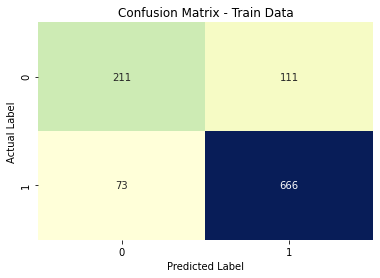



------------------------------------------------------------
AUC: 0.877




------------------------------------------------------------


Test Accuracy Score for model LogisticRegression() is 0.8552631578947368


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.81      0.68      0.74       138
           1       0.87      0.93      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.86      0.85       456

------------------------------------------------------------




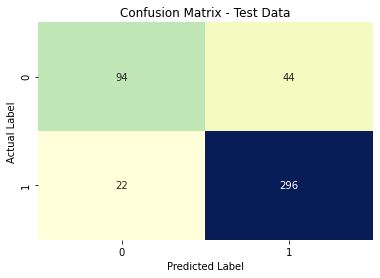



------------------------------------------------------------
AUC: 0.913




------------------------------------------------------------


In [101]:
lr = LogisticRegression()
lr_age_scaled_metrics_df,best_model_lr=apply_evl("LogisticRegression_Age_Scaled",lr,param_grid_lr,X_train_age_scaled,X_test_age_scaled,
          y_train_age_scaled,y_test_age_scaled)

In [102]:
lr_age_scaled_metrics_df

LogisticRegression_Age_Scaled_Train  \
Accuracy                              0.826579   
Precision                             0.857143   
Recall                                0.901218   
F1                                    0.878628   
AUC                                   0.877130   

           LogisticRegression_Age_Scaled_Test  
Accuracy                             0.855263  
Precision                            0.870588  
Recall                               0.930818  
F1                                   0.899696  
AUC                                  0.912588

In [103]:
metrics_df_lst.append(lr_age_scaled_metrics_df)

# Comparison

In [104]:
data_lr=pd.concat([lr_all_unscaled_metrics_df,lr_all_scaled_metrics_df,lr_age_scaled_metrics_df],axis=1)

In [105]:
data_lr

LogisticRegression_All_Unscaled_Train  \
Accuracy                                0.826579   
Precision                               0.857143   
Recall                                  0.901218   
F1                                      0.878628   
AUC                                     0.877176   

           LogisticRegression_All_Unscaled_Test  \
Accuracy                               0.857456   
Precision                              0.870968   
Recall                                 0.933962   
F1                                     0.901366   
AUC                                    0.913408   

           LogisticRegression_All_Scaled_Train  \
Accuracy                              0.826579   
Precision                             0.857143   
Recall                                0.901218   
F1                                    0.878628   
AUC                                   0.877130   

           LogisticRegression_All_Scaled_Test  \
Accuracy                             0.855263   
Precision                            0.870588   
Recall                               0.930818   
F1                                   0.899696   
AUC                                  0.912497   

           LogisticRegression_Age_Scaled_Train  \
Accuracy                              0.826579   
Precision                             0.857143   
Recall                                0.901218   
F1                                    0.878628   
AUC                                   0.877130   

           LogisticRegression_Age_Scaled_Test  
Accuracy                             0.855263  
Precision                            0.870588  
Recall                               0.930818  
F1                                   0.899696  
AUC                                  0.912588

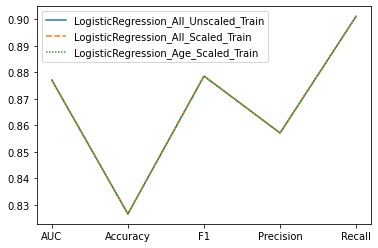

In [106]:
sns.lineplot(data=data_lr.T[0::2].T)

In [107]:
sns.lineplot(data=data_lr.T[1::2].T)

## Hence All Unscaled data performed well on test as well as train data, hence we select all unscaled data

# LDA - Linear Discriminant Analysis

In [108]:
param_grid_lda = {'solver': ['svd', 'lsqr', 'eigen'],
              'shrinkage': ['auto', 'none', 'default'],
              'tol': [0.000001, 0.0000001, 0.000000001]}

## All Unscaled

LDA_All_unscaled
--------------------Best Parameters--------------------
{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 1e-06}


--------------------Best Model Params--------------------
LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=1e-06)


Train Accuracy Score for model LinearDiscriminantAnalysis() is 0.825636192271442


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.73      0.68      0.70       322
           1       0.87      0.89      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.79      1061
weighted avg       0.82      0.83      0.82      1061

------------------------------------------------------------




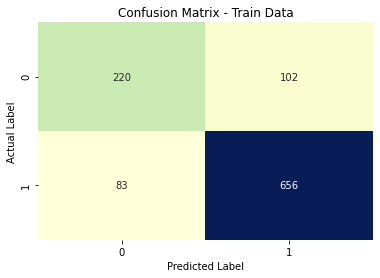



------------------------------------------------------------
AUC: 0.877


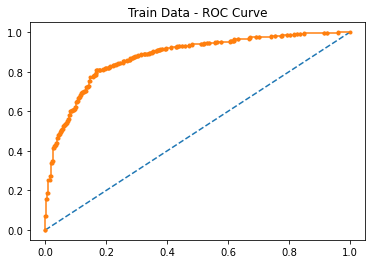



------------------------------------------------------------


Test Accuracy Score for model LinearDiscriminantAnalysis() is 0.8596491228070176


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.80      0.71      0.75       138
           1       0.88      0.92      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.82      0.83       456
weighted avg       0.86      0.86      0.86       456

------------------------------------------------------------




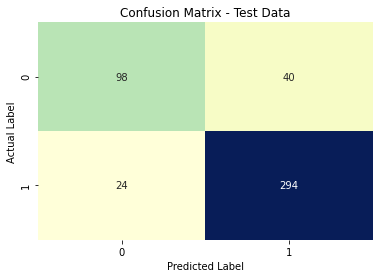



------------------------------------------------------------
AUC: 0.915


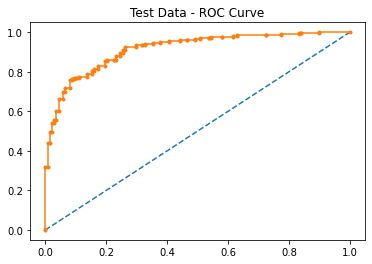



------------------------------------------------------------


In [112]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda_all_unscaled_metrics_df,best_model_lda=apply_evl("LDA_All_unscaled",lda,param_grid_lda,X_train_all_unscaled,X_test_all_unscaled,
          y_train_all_unscaled,y_test_all_unscaled)

In [113]:
lda_all_unscaled_metrics_df

LDA_All_unscaled_Train  LDA_All_unscaled_Test
Accuracy                 0.825636               0.859649
Precision                0.865435               0.880240
Recall                   0.887686               0.924528
F1                       0.876420               0.901840
AUC                      0.876869               0.915231

In [114]:
metrics_df_lst.append(lda_all_unscaled_metrics_df)

## All Scaled

LDA_All_Scaled
--------------------Best Parameters--------------------
{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 1e-06}


--------------------Best Model Params--------------------
LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=1e-06)


Train Accuracy Score for model LinearDiscriminantAnalysis() is 0.825636192271442


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.73      0.68      0.70       322
           1       0.87      0.89      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.79      1061
weighted avg       0.82      0.83      0.82      1061

------------------------------------------------------------




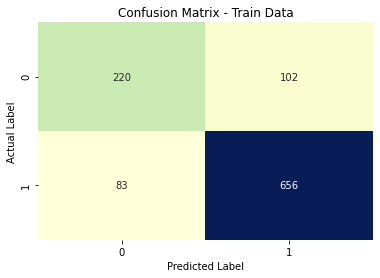



------------------------------------------------------------
AUC: 0.877


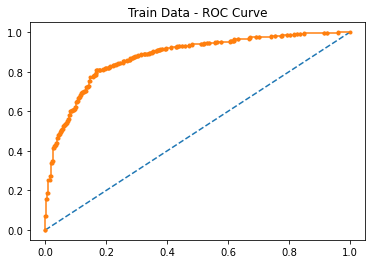



------------------------------------------------------------


Test Accuracy Score for model LinearDiscriminantAnalysis() is 0.8596491228070176


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.80      0.71      0.75       138
           1       0.88      0.92      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.82      0.83       456
weighted avg       0.86      0.86      0.86       456

------------------------------------------------------------




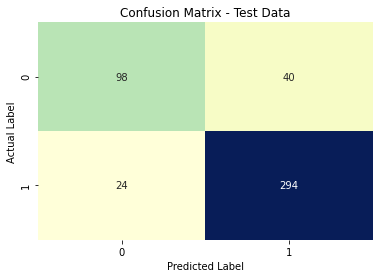



------------------------------------------------------------
AUC: 0.915


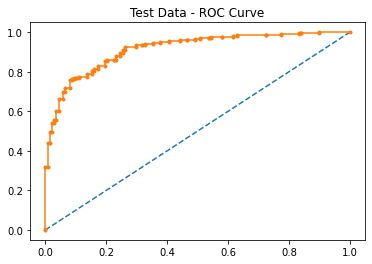



------------------------------------------------------------


In [115]:
lda = LinearDiscriminantAnalysis()
lda_all_scaled_metrics_df,best_model_lda=apply_evl("LDA_All_Scaled",lda,param_grid_lda,X_train_all_scaled,X_test_all_scaled,
          y_train_all_scaled,y_test_all_scaled)

In [116]:
lda_all_scaled_metrics_df

LDA_All_Scaled_Train  LDA_All_Scaled_Test
Accuracy               0.825636             0.859649
Precision              0.865435             0.880240
Recall                 0.887686             0.924528
F1                     0.876420             0.901840
AUC                    0.876869             0.915231

In [117]:
metrics_df_lst.append(lda_all_scaled_metrics_df)

## Age Scaled

LDA_Age_Scaled
--------------------Best Parameters--------------------
{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 1e-06}


--------------------Best Model Params--------------------
LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=1e-06)


Train Accuracy Score for model LinearDiscriminantAnalysis() is 0.825636192271442


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.73      0.68      0.70       322
           1       0.87      0.89      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.79      1061
weighted avg       0.82      0.83      0.82      1061

------------------------------------------------------------




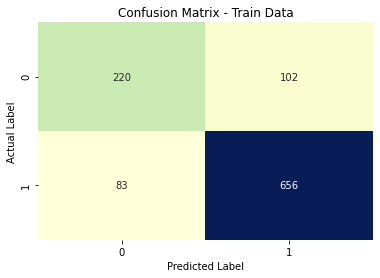



------------------------------------------------------------
AUC: 0.877


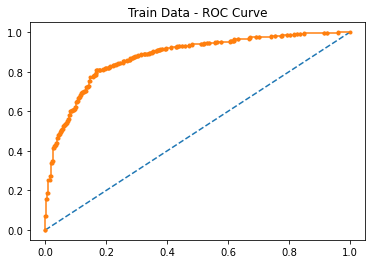



------------------------------------------------------------


Test Accuracy Score for model LinearDiscriminantAnalysis() is 0.8596491228070176


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.80      0.71      0.75       138
           1       0.88      0.92      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.82      0.83       456
weighted avg       0.86      0.86      0.86       456

------------------------------------------------------------




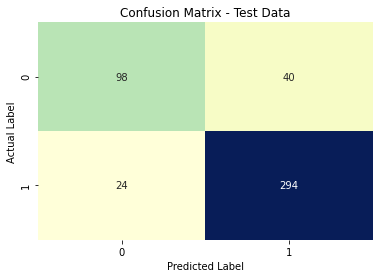



------------------------------------------------------------
AUC: 0.915


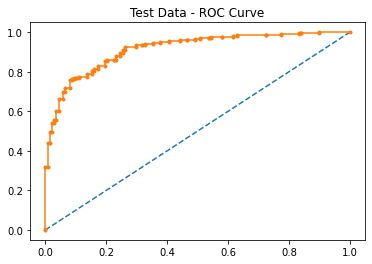



------------------------------------------------------------


In [118]:
lda = LinearDiscriminantAnalysis()
lda_age_scaled_metrics_df,best_model_lda=apply_evl("LDA_Age_Scaled",lda,param_grid_lda,X_train_age_scaled,X_test_age_scaled,
          y_train_age_scaled,y_test_age_scaled)

In [119]:
lda_age_scaled_metrics_df

LDA_Age_Scaled_Train  LDA_Age_Scaled_Test
Accuracy               0.825636             0.859649
Precision              0.865435             0.880240
Recall                 0.887686             0.924528
F1                     0.876420             0.901840
AUC                    0.876869             0.915231

In [120]:
metrics_df_lst.append(lda_age_scaled_metrics_df)

## Comparison

In [121]:
data_lda=pd.concat([lda_all_unscaled_metrics_df,lda_all_scaled_metrics_df,lda_age_scaled_metrics_df],axis=1)

In [122]:
data_lda

LDA_All_unscaled_Train  LDA_All_unscaled_Test  \
Accuracy                 0.825636               0.859649   
Precision                0.865435               0.880240   
Recall                   0.887686               0.924528   
F1                       0.876420               0.901840   
AUC                      0.876869               0.915231   

           LDA_All_Scaled_Train  LDA_All_Scaled_Test  LDA_Age_Scaled_Train  \
Accuracy               0.825636             0.859649              0.825636   
Precision              0.865435             0.880240              0.865435   
Recall                 0.887686             0.924528              0.887686   
F1                     0.876420             0.901840              0.876420   
AUC                    0.876869             0.915231              0.876869   

           LDA_Age_Scaled_Test  
Accuracy              0.859649  
Precision             0.880240  
Recall                0.924528  
F1                    0.901840  
AUC                   0.915231

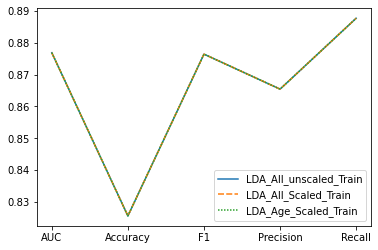

In [123]:
sns.lineplot(data=data_lda.T[0::2].T)

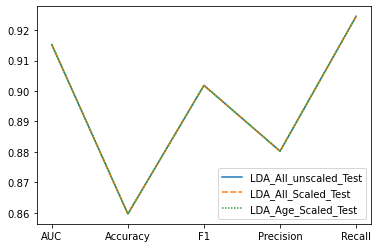

In [124]:
sns.lineplot(data=data_lda.T[1::2].T)

## Scaling did not made any difference to the performance of LDA.
## Hence we choose the dataset without scaling, since Logistic as well as LDA both fall under linear models subcategory of Geometric models. We will do scaling only for distance based models like KNN and KMeans

# Applying KNN - We will only used All scaled data set for KNN

In [125]:
param_grid_knn = {'n_neighbors': [5, 10, 15, 18, 19, 20],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [2, 3, 4, 5, 6, 7, 8, 10],
              'metric': ['minkowski', 'euclidean'],
             }

KNN_All_Scaled
--------------------Best Parameters--------------------
{'algorithm': 'auto', 'leaf_size': 2, 'metric': 'minkowski', 'n_neighbors': 18, 'weights': 'uniform'}


--------------------Best Model Params--------------------
KNeighborsClassifier(leaf_size=2, n_neighbors=18)


Train Accuracy Score for model KNeighborsClassifier() is 0.8407163053722903


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       322
           1       0.89      0.88      0.89       739

    accuracy                           0.84      1061
   macro avg       0.81      0.81      0.81      1061
weighted avg       0.84      0.84      0.84      1061

------------------------------------------------------------




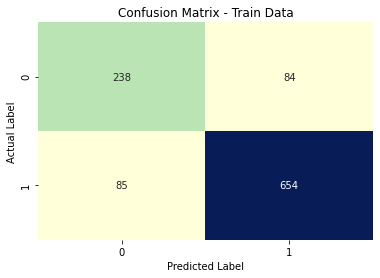



------------------------------------------------------------
AUC: 0.902


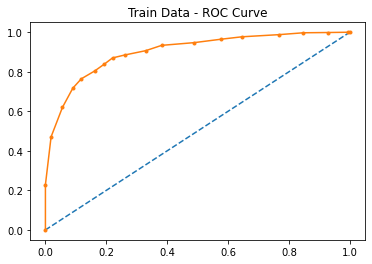



------------------------------------------------------------


Test Accuracy Score for model KNeighborsClassifier() is 0.8574561403508771


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       138
           1       0.89      0.91      0.90       318

    accuracy                           0.86       456
   macro avg       0.83      0.83      0.83       456
weighted avg       0.86      0.86      0.86       456

------------------------------------------------------------




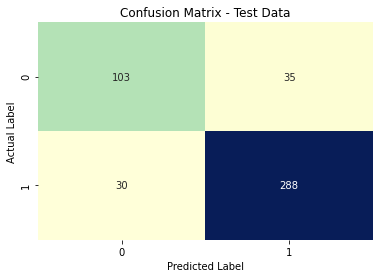



------------------------------------------------------------
AUC: 0.901


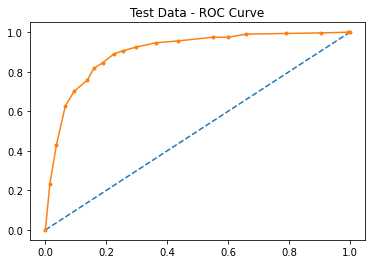



------------------------------------------------------------


In [127]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_all_scaled_metrics_df,best_model_knn=apply_evl("KNN_All_Scaled",knn,param_grid_knn,X_train_all_scaled,X_test_all_scaled,
          y_train_all_scaled,y_test_all_scaled)

In [128]:
knn_all_scaled_metrics_df

KNN_All_Scaled_Train  KNN_All_Scaled_Test
Accuracy               0.840716             0.857456
Precision              0.886179             0.891641
Recall                 0.884980             0.905660
F1                     0.885579             0.898596
AUC                    0.901882             0.900818

## Optimal Number of K

In [129]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_all_scaled, y_train_all_scaled)
    # evaluate accuracy
    scores = knn.score(X_test_all_scaled, y_test_all_scaled)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE


[0.20175438596491224,
 0.1535087719298246,
 0.16228070175438591,
 0.15131578947368418,
 0.13815789473684215,
 0.13815789473684215,
 0.13596491228070173,
 0.13815789473684215,
 0.14254385964912286,
 0.14692982456140347]

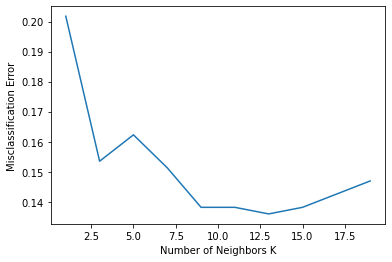

In [130]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

## Keeping K=13

In [131]:
param_grid_knn = {'n_neighbors': [13],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [2, 3, 4, 5, 6, 7, 8, 10],
              'metric': ['minkowski', 'euclidean'],
             }

KNN_All_Scaled
--------------------Best Parameters--------------------
{'algorithm': 'auto', 'leaf_size': 2, 'metric': 'minkowski', 'n_neighbors': 13, 'weights': 'uniform'}


--------------------Best Model Params--------------------
KNeighborsClassifier(leaf_size=2, n_neighbors=13)


Train Accuracy Score for model KNeighborsClassifier() is 0.8397737983034873


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       322
           1       0.88      0.90      0.89       739

    accuracy                           0.84      1061
   macro avg       0.81      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061

------------------------------------------------------------




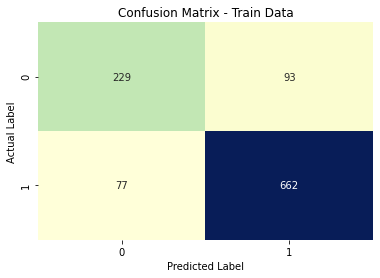



------------------------------------------------------------
AUC: 0.903


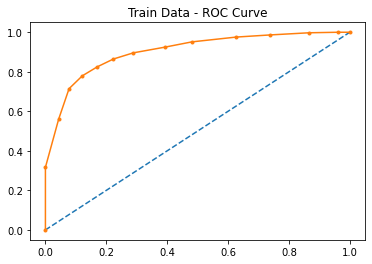



------------------------------------------------------------


Test Accuracy Score for model KNeighborsClassifier() is 0.8640350877192983


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.78      0.77      0.77       138
           1       0.90      0.91      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.84      0.84       456
weighted avg       0.86      0.86      0.86       456

------------------------------------------------------------




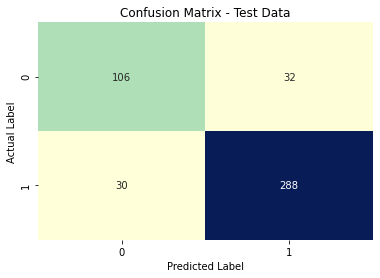



------------------------------------------------------------
AUC: 0.894




------------------------------------------------------------


In [132]:
knn = KNeighborsClassifier()
knn_all_scaled_metrics_df,best_model_knn=apply_evl("KNN_All_Scaled",knn,param_grid_knn,X_train_all_scaled,X_test_all_scaled,
          y_train_all_scaled,y_test_all_scaled)

In [133]:
knn_all_scaled_metrics_df

KNN_All_Scaled_Train  KNN_All_Scaled_Test
Accuracy               0.839774             0.864035
Precision              0.876821             0.900000
Recall                 0.895805             0.905660
F1                     0.886212             0.902821
AUC                    0.902943             0.894062

In [134]:
metrics_df_lst.append(knn_all_scaled_metrics_df)

# Naive Bayes

## We will use only all unscaled data set

NB_All_Unscaled
Train Accuracy Score for model GaussianNB() is 0.8199811498586239


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       322
           1       0.87      0.87      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.79      0.79      1061
weighted avg       0.82      0.82      0.82      1061

------------------------------------------------------------




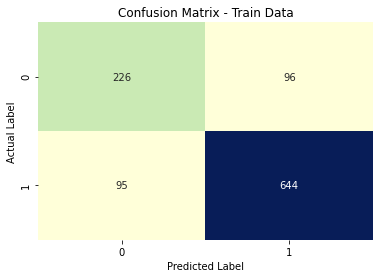



------------------------------------------------------------
AUC: 0.873


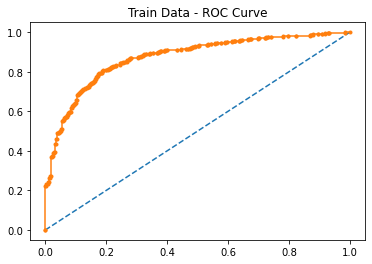



------------------------------------------------------------


Test Accuracy Score for model GaussianNB() is 0.8574561403508771


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       138
           1       0.88      0.92      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.82      0.83       456
weighted avg       0.86      0.86      0.86       456

------------------------------------------------------------






------------------------------------------------------------
AUC: 0.912


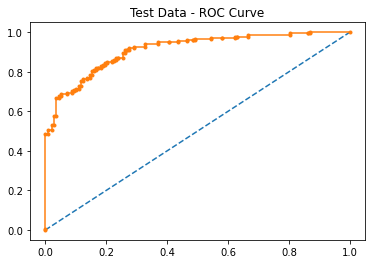



------------------------------------------------------------


In [135]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_all_unscaled_metrics_df,best_model_nb=apply_evl("NB_All_Unscaled",NB_model,None,X_train_all_unscaled,X_test_all_unscaled,
          y_train_all_unscaled,y_test_all_unscaled)

In [136]:
NB_all_unscaled_metrics_df

NB_All_Unscaled_Train  NB_All_Unscaled_Test
Accuracy                0.819981              0.857456
Precision               0.870270              0.884498
Recall                  0.871448              0.915094
F1                      0.870859              0.899536
AUC                     0.873162              0.912497

In [137]:
metrics_df_lst.append(NB_all_unscaled_metrics_df)

## Model Tuning

## Check for data imbalance

In [138]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from numpy import where
oversample = SMOTE()

In [139]:
df_org['vote'].value_counts(normalize=True)

Labour          0.69677
Conservative    0.30323
Name: vote, dtype: float64

In [140]:
counter=Counter(y_train_all_unscaled)
counter

Counter({1: 739, 0: 322})

In [141]:
X_train_all_unscaled_smote, y_train_all_unscaled_smote = oversample.fit_resample(X_train_all_unscaled, 
                                                                     y_train_all_unscaled)

In [142]:
counter=Counter(y_train_all_unscaled_smote)
counter

Counter({1: 739, 0: 739})

In [143]:
X_train_all_unscaled_smote.shape

(1478, 8)

In [144]:
y_train_all_unscaled_smote.shape

(1478,)

In [145]:
X_train_all_unscaled_smote.head()

age  economic.cond.national  economic.cond.household  Blair  Hague  Europe  \
0   71                       3                        3      4      2      11   
1   57                       4                        5      4      1       3   
2   24                       3                        4      2      4      11   
3   43                       4                        4      2      3       5   
4   37                       3                        2      4      2       7   

   political.knowledge  gender  
0                    0       0  
1                    2       0  
2                    0       1  
3                    0       1  
4                    2       1

## Dataset is now balanced

## Applying simple Decision Tree and Regularizing the Model

## Applying GridSearchCV on Balanced DataSet (_Smote)

In [146]:
param_grid_cart = {
    'max_depth': [5,6,7,8,9,10],
    'max_features': [2,4,6,8],
    'min_samples_leaf': [10,20,30,40,50,75,100],
    'min_samples_split': [50,100,150,200,250,300],
}

CART_All_Unscaled_SMOTE
--------------------Best Parameters--------------------
{'max_depth': 6, 'max_features': 6, 'min_samples_leaf': 30, 'min_samples_split': 50}


--------------------Best Model Params--------------------
DecisionTreeClassifier(max_depth=6, max_features=6, min_samples_leaf=30,
                       min_samples_split=50)


Train Accuracy Score for model DecisionTreeClassifier() is 0.8234100135317998


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       739
           1       0.81      0.85      0.83       739

    accuracy                           0.82      1478
   macro avg       0.82      0.82      0.82      1478
weighted avg       0.82      0.82      0.82      1478

------------------------------------------------------------




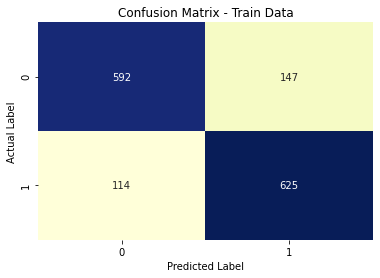



------------------------------------------------------------
AUC: 0.904


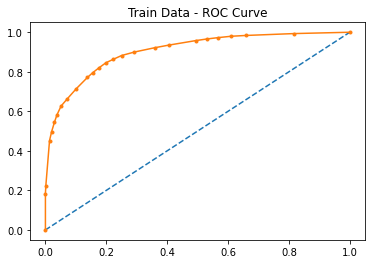



------------------------------------------------------------


Test Accuracy Score for model DecisionTreeClassifier() is 0.8245614035087719


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       138
           1       0.88      0.87      0.87       318

    accuracy                           0.82       456
   macro avg       0.79      0.80      0.79       456
weighted avg       0.83      0.82      0.83       456

------------------------------------------------------------




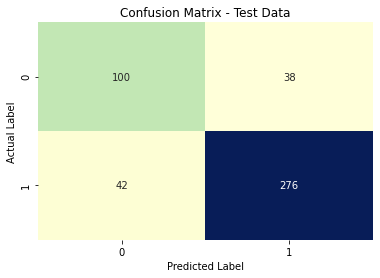



------------------------------------------------------------
AUC: 0.881


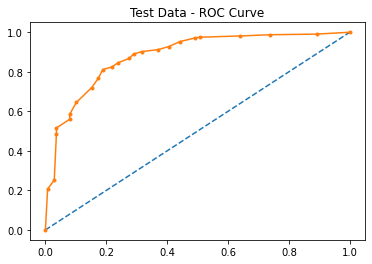



------------------------------------------------------------


In [147]:
from sklearn.tree import DecisionTreeClassifier
cart_model = DecisionTreeClassifier()
cart_all_unscaled_smote_metrics_df,best_model_cart=apply_evl("CART_All_Unscaled_SMOTE",cart_model,param_grid_cart,
                                             X_train_all_unscaled_smote,X_test_all_unscaled,
          y_train_all_unscaled_smote,y_test_all_unscaled)

In [148]:
cart_all_unscaled_smote_metrics_df

CART_All_Unscaled_SMOTE_Train  CART_All_Unscaled_SMOTE_Test
Accuracy                        0.823410                      0.824561
Precision                       0.809585                      0.878981
Recall                          0.845737                      0.867925
F1                              0.827267                      0.873418
AUC                             0.903985                      0.881426

In [149]:
metrics_df_lst.append(cart_all_unscaled_smote_metrics_df)

In [150]:
from sklearn import tree
train_char_label = ['Conservative', 'Labour']
Tree_File = open('cart_tree_with_SMOTE.dot','w')
dot_data = tree.export_graphviz(best_model_cart, out_file=Tree_File, 
                                feature_names = list(X_train_all_unscaled_smote), 
                                class_names = list(train_char_label))
Tree_File.close()

In [153]:
from os import system
from IPython.display import Image 
#Works only if "dot" command works on you machine

retCode = system("dot -Tpng cart_tree_with_SMOTE.dot -o cart_tree_with_SMOTE.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("cart_tree_with_SMOTE.png"))    

In [154]:
print (pd.DataFrame(best_model_cart.feature_importances_, columns = ["Imp"], 
                    index = X_train_all_unscaled_smote.columns))

                              Imp
age                      0.017746
economic.cond.national   0.040881
economic.cond.household  0.002040
Blair                    0.236260
Hague                    0.483407
Europe                   0.125726
political.knowledge      0.093941
gender                   0.000000


## CART Without SMOTE

In [155]:
param_grid_cart = {
    'max_depth': [5,6,7,8,9,10],
    'max_features': [2,4,6,8],
    'min_samples_leaf': [10,20,30,40,50,75,100],
    'min_samples_split': [50,100,150,200,250,300],
}

CART_All_Unscaled
--------------------Best Parameters--------------------
{'max_depth': 9, 'max_features': 6, 'min_samples_leaf': 10, 'min_samples_split': 50}


--------------------Best Model Params--------------------
DecisionTreeClassifier(max_depth=9, max_features=6, min_samples_leaf=10,
                       min_samples_split=50)


Train Accuracy Score for model DecisionTreeClassifier() is 0.8369462770970783


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.74      0.71      0.73       322
           1       0.88      0.89      0.88       739

    accuracy                           0.84      1061
   macro avg       0.81      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061

------------------------------------------------------------




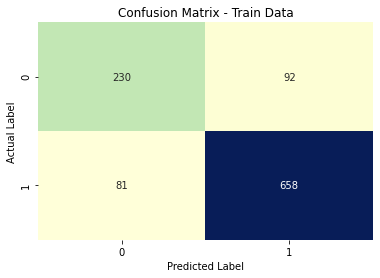



------------------------------------------------------------
AUC: 0.896




------------------------------------------------------------


Test Accuracy Score for model DecisionTreeClassifier() is 0.8464912280701754


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       138
           1       0.88      0.91      0.89       318

    accuracy                           0.85       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.84      0.85      0.84       456

------------------------------------------------------------




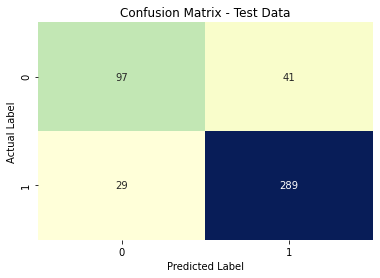



------------------------------------------------------------
AUC: 0.886


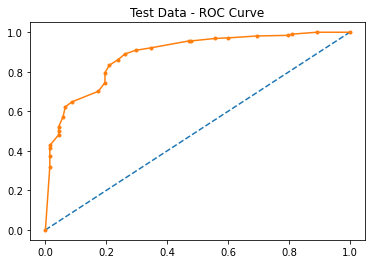



------------------------------------------------------------


In [156]:
from sklearn.tree import DecisionTreeClassifier
cart_model = DecisionTreeClassifier()
cart_all_unscaled_metrics_df,best_model_cart=apply_evl("CART_All_Unscaled",cart_model,param_grid_cart,
                                             X_train_all_unscaled,X_test_all_unscaled,
          y_train_all_unscaled,y_test_all_unscaled)

In [157]:
cart_all_unscaled_metrics_df

CART_All_Unscaled_Train  CART_All_Unscaled_Test
Accuracy                  0.836946                0.846491
Precision                 0.877333                0.875758
Recall                    0.890392                0.908805
F1                        0.883815                0.891975
AUC                       0.896253                0.885813

In [158]:
metrics_df_lst.append(cart_all_unscaled_metrics_df)

In [159]:
from sklearn import tree
train_char_label = ['Conservative', 'Labour']
Tree_File = open('cart_tree_without_SMOTE.dot','w')
dot_data = tree.export_graphviz(best_model_cart, out_file=Tree_File, 
                                feature_names = list(X_train_all_unscaled), 
                                class_names = list(train_char_label))
Tree_File.close()

In [160]:
from os import system
from IPython.display import Image  
#Works only if "dot" command works on you machine
retCode = system("dot -Tpng cart_tree_without_SMOTE.dot -o cart_tree_without_SMOTE.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("cart_tree_without_SMOTE.png"))    

In [161]:
print (pd.DataFrame(best_model_cart.feature_importances_, columns = ["Imp"], 
                    index = X_train_all_unscaled.columns))

                              Imp
age                      0.037904
economic.cond.national   0.041460
economic.cond.household  0.001085
Blair                    0.100264
Hague                    0.459859
Europe                   0.222929
political.knowledge      0.135453
gender                   0.001046


## We do not see any significant improvement by introducing synthetic data using SMOTE

## Applying Random Forest with SMOTE

In [162]:
param_grid_rf = {
    'max_depth': [10,20,30],
    'max_features': [2,3,4,5,6,7,8],
    'min_samples_leaf': [25,50,75,100],
    'min_samples_split': [25,50,75,100],
    'n_estimators': [50,100,150]
}

param_grid = {
    'max_depth': [20,35,30,35,40,45,50],
    'max_features': [2,3,4,5,6,7,8],
    'min_samples_leaf': [15,20,25,30,35,40],
    'min_samples_split': [50,55,60,65,70,75,80,85,90,95,100],
    'n_estimators': [30,40,50,60,70]
}

In [164]:
from sklearn.ensemble import RandomForestClassifier
rf_model_smote = RandomForestClassifier()
rf_all_unscaled_smote_metrics_df,best_model_rf=apply_evl("RF_All_Unscaled_SMOTE",rf_model_smote,param_grid_rf,
                                             X_train_all_unscaled_smote,X_test_all_unscaled,
          y_train_all_unscaled_smote,y_test_all_unscaled)

RF_All_Unscaled_SMOTE
--------------------Best Parameters--------------------
{'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 25, 'min_samples_split': 25, 'n_estimators': 150}


--------------------Best Model Params--------------------
RandomForestClassifier(max_depth=10, max_features=3, min_samples_leaf=25,
                       min_samples_split=25, n_estimators=150)


Train Accuracy Score for model RandomForestClassifier() is 0.8335588633288228


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       739
           1       0.83      0.83      0.83       739

    accuracy                           0.83      1478
   macro avg       0.83      0.83      0.83      1478
weighted avg       0.83      0.83      0.83      1478

------------------------------------------------------------






------------------------------------------------------------
AUC: 0.918




------------------------------------------------------------


Test Accuracy Score for model RandomForestClassifier() is 0.8464912280701754


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.72      0.81      0.76       138
           1       0.91      0.86      0.89       318

    accuracy                           0.85       456
   macro avg       0.82      0.84      0.82       456
weighted avg       0.85      0.85      0.85       456

------------------------------------------------------------






------------------------------------------------------------
AUC: 0.919




------------------------------------------------------------


In [165]:
rf_all_unscaled_smote_metrics_df

RF_All_Unscaled_SMOTE_Train  RF_All_Unscaled_SMOTE_Test
Accuracy                      0.833559                    0.846491
Precision                     0.833559                    0.913333
Recall                        0.833559                    0.861635
F1                            0.833559                    0.886731
AUC                           0.918066                    0.919333

In [166]:
metrics_df_lst.append(rf_all_unscaled_smote_metrics_df)

## Applying Random Forest Without SMOTE

RF_All_Unscaled
--------------------Best Parameters--------------------
{'max_depth': 20, 'max_features': 3, 'min_samples_leaf': 25, 'min_samples_split': 75, 'n_estimators': 50}


--------------------Best Model Params--------------------
RandomForestClassifier(max_depth=20, max_features=3, min_samples_leaf=25,
                       min_samples_split=75, n_estimators=50)


Train Accuracy Score for model RandomForestClassifier() is 0.822808671065033


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.78      0.58      0.67       322
           1       0.84      0.93      0.88       739

    accuracy                           0.82      1061
   macro avg       0.81      0.75      0.77      1061
weighted avg       0.82      0.82      0.81      1061

------------------------------------------------------------




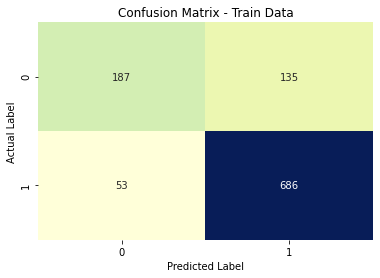



------------------------------------------------------------
AUC: 0.891


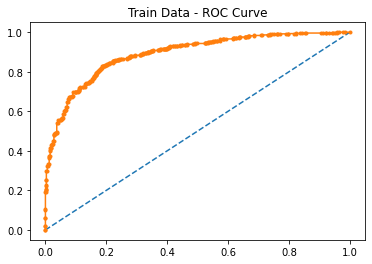



------------------------------------------------------------


Test Accuracy Score for model RandomForestClassifier() is 0.8530701754385965


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.85      0.62      0.72       138
           1       0.85      0.95      0.90       318

    accuracy                           0.85       456
   macro avg       0.85      0.79      0.81       456
weighted avg       0.85      0.85      0.85       456

------------------------------------------------------------




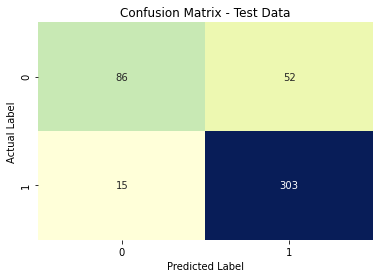



------------------------------------------------------------
AUC: 0.913


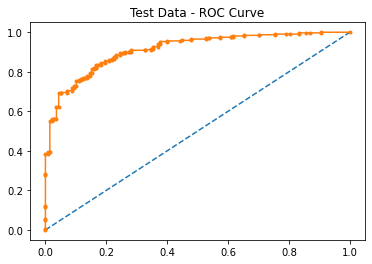



------------------------------------------------------------


In [168]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_all_unscaled_metrics_df,best_model_rf=apply_evl("RF_All_Unscaled",rf_model,param_grid_rf,
                                             X_train_all_unscaled,X_test_all_unscaled,
          y_train_all_unscaled,y_test_all_unscaled)

In [169]:
rf_all_unscaled_metrics_df

RF_All_Unscaled_Train  RF_All_Unscaled_Test
Accuracy                0.822809              0.853070
Precision               0.835566              0.853521
Recall                  0.928281              0.952830
F1                      0.879487              0.900446
AUC                     0.891201              0.912611

In [170]:
metrics_df_lst.append(rf_all_unscaled_metrics_df)

## RandomForest without SMOTE performs better than RF with synthetic data.
## Hence we conclude and will use unscaled data without SMOTE going forward

# Applying Ensemble Technique -  Bagging on CART (Without SMOTE, since it is not adding any value to our models)

In [171]:
param_grid_bagging = {'n_estimators': [20,30,40,50,60,70,80],
                  'base_estimator': [best_model_cart],
                  'max_features': [2,3,4,5,6,7,8],
                  'random_state': [0, 1, 23]}

BGCL_All_Unscaled
--------------------Best Parameters--------------------
{'base_estimator': DecisionTreeClassifier(max_depth=9, max_features=6, min_samples_leaf=10,
                       min_samples_split=50), 'max_features': 6, 'n_estimators': 50, 'random_state': 0}


--------------------Best Model Params--------------------
BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=9,
                                                        max_features=6,
                                                        min_samples_leaf=10,
                                                        min_samples_split=50),
                  max_features=6, n_estimators=50, random_state=0)


Train Accuracy Score for model BaggingClassifier() is 0.8473138548539114


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.81      0.65      0.72       322
           1       0.86      0.93      0.89  



------------------------------------------------------------
AUC: 0.917


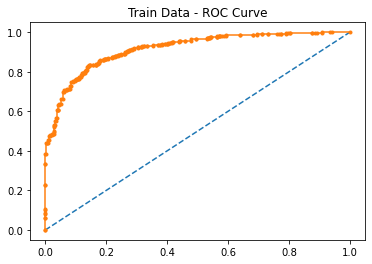



------------------------------------------------------------


Test Accuracy Score for model BaggingClassifier() is 0.8486842105263158


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.82      0.64      0.72       138
           1       0.86      0.94      0.90       318

    accuracy                           0.85       456
   macro avg       0.84      0.79      0.81       456
weighted avg       0.85      0.85      0.84       456

------------------------------------------------------------






------------------------------------------------------------
AUC: 0.915


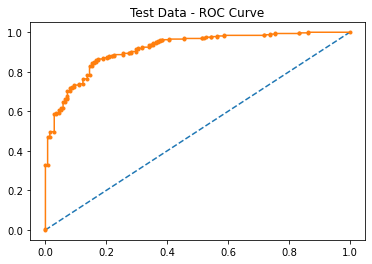



------------------------------------------------------------


In [172]:
from sklearn.ensemble import BaggingClassifier
bgcl_model = BaggingClassifier()
bgcl_all_unscaled_metrics_df,best_model_bgcl=apply_evl("BGCL_All_Unscaled",bgcl_model,param_grid_bagging,
                                             X_train_all_unscaled,X_test_all_unscaled,
          y_train_all_unscaled,y_test_all_unscaled)

In [173]:
bgcl_all_unscaled_metrics_df

BGCL_All_Unscaled_Train  BGCL_All_Unscaled_Test
Accuracy                  0.847314                0.848684
Precision                 0.860175                0.858790
Recall                    0.932341                0.937107
F1                        0.894805                0.896241
AUC                       0.916700                0.914969

In [174]:
metrics_df_lst.append(bgcl_all_unscaled_metrics_df)

# ADABOOST Without SMOTE

In [175]:
param_grid_AB = {
    'n_estimators': [1,3,3,4,5,6,7,8,9,10,11,12,13,14,15],
    'random_state':[0,1,21,23,100,200]}

AB_All_Unscaled
--------------------Best Parameters--------------------
{'n_estimators': 9, 'random_state': 0}


--------------------Best Model Params--------------------
AdaBoostClassifier(n_estimators=9, random_state=0)


Train Accuracy Score for model AdaBoostClassifier() is 0.8350612629594723


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.73      0.72      0.73       322
           1       0.88      0.89      0.88       739

    accuracy                           0.84      1061
   macro avg       0.81      0.80      0.80      1061
weighted avg       0.83      0.84      0.83      1061

------------------------------------------------------------






------------------------------------------------------------
AUC: 0.883


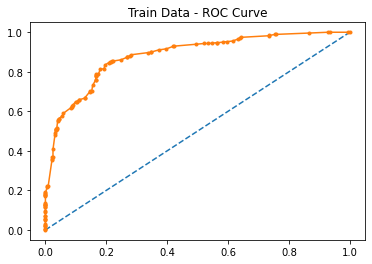



------------------------------------------------------------


Test Accuracy Score for model AdaBoostClassifier() is 0.8530701754385965


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.77      0.74      0.75       138
           1       0.89      0.90      0.90       318

    accuracy                           0.85       456
   macro avg       0.83      0.82      0.82       456
weighted avg       0.85      0.85      0.85       456

------------------------------------------------------------




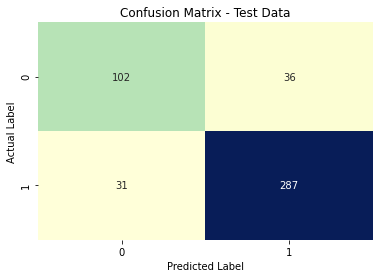



------------------------------------------------------------
AUC: 0.911


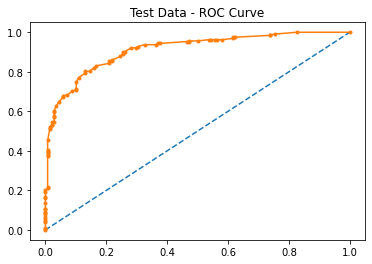



------------------------------------------------------------


In [176]:
from sklearn.ensemble import AdaBoostClassifier
AB_model = AdaBoostClassifier()
AB_all_unscaled_metrics_df,best_model_AB=apply_evl("AB_All_Unscaled",AB_model,param_grid_AB,
                                             X_train_all_unscaled,X_test_all_unscaled,
          y_train_all_unscaled,y_test_all_unscaled)

In [177]:
AB_all_unscaled_metrics_df

AB_All_Unscaled_Train  AB_All_Unscaled_Test
Accuracy                0.835061              0.853070
Precision               0.878016              0.888545
Recall                  0.886333              0.902516
F1                      0.882155              0.895476
AUC                     0.882607              0.911357

In [178]:
metrics_df_lst.append(AB_all_unscaled_metrics_df)

# GradientBoost Without SMOTE

In [179]:
param_grid_GB = {
    'n_estimators': [81,82,83,84,85,86,87,88,89,90,91,92,93,94,95],
    'loss':['deviance', 'exponential'],
    'criterion': ['friedman_mse', 'mse', 'mae']}

GB_All_Unscaled
--------------------Best Parameters--------------------
{'criterion': 'mse', 'loss': 'exponential', 'n_estimators': 90}


--------------------Best Model Params--------------------
GradientBoostingClassifier(criterion='mse', loss='exponential', n_estimators=90)


Train Accuracy Score for model GradientBoostingClassifier() is 0.883129123468426


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       322
           1       0.91      0.93      0.92       739

    accuracy                           0.88      1061
   macro avg       0.87      0.85      0.86      1061
weighted avg       0.88      0.88      0.88      1061

------------------------------------------------------------






------------------------------------------------------------
AUC: 0.946




------------------------------------------------------------


Test Accuracy Score for model GradientBoostingClassifier() is 0.8399122807017544


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.76      0.70      0.72       138
           1       0.87      0.90      0.89       318

    accuracy                           0.84       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.84      0.84      0.84       456

------------------------------------------------------------






------------------------------------------------------------
AUC: 0.901


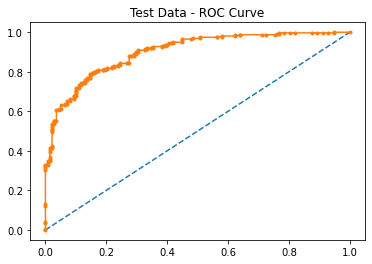



------------------------------------------------------------


In [180]:
from sklearn.ensemble import GradientBoostingClassifier
GB_model = GradientBoostingClassifier()
GB_all_unscaled_metrics_df,best_model_GB=apply_evl("GB_All_Unscaled",GB_model,param_grid_GB,
                                             X_train_all_unscaled,X_test_all_unscaled,
          y_train_all_unscaled,y_test_all_unscaled)

In [181]:
GB_all_unscaled_metrics_df

GB_All_Unscaled_Train  GB_All_Unscaled_Test
Accuracy                0.883129              0.839912
Precision               0.906209              0.872340
Recall                  0.928281              0.902516
F1                      0.917112              0.887172
AUC                     0.946400              0.901160

In [182]:
metrics_df_lst.append(GB_all_unscaled_metrics_df)

In [ ]:
GB_all_unscaled_SMOTE_metrics_df

# Final Comparison

In [183]:
len(lst)

8

In [184]:
for i in lst:
    df=pd.concat([metrics_df_lst[0],metrics_df_lst[1],metrics_df_lst[2],metrics_df_lst[3],metrics_df_lst[4],
               metrics_df_lst[5],metrics_df_lst[6],metrics_df_lst[7],metrics_df_lst[8],metrics_df_lst[9],
               metrics_df_lst[10],metrics_df_lst[11],metrics_df_lst[12],metrics_df_lst[13],metrics_df_lst[14]],axis=1)
df

LogisticRegression_All_Unscaled_Train  \
Accuracy                                0.826579   
Precision                               0.857143   
Recall                                  0.901218   
F1                                      0.878628   
AUC                                     0.877176   

           LogisticRegression_All_Unscaled_Test  \
Accuracy                               0.857456   
Precision                              0.870968   
Recall                                 0.933962   
F1                                     0.901366   
AUC                                    0.913408   

           LogisticRegression_All_Scaled_Train  \
Accuracy                              0.826579   
Precision                             0.857143   
Recall                                0.901218   
F1                                    0.878628   
AUC                                   0.877130   

           LogisticRegression_All_Scaled_Test  \
Accuracy                             0.855263   
Precision                            0.870588   
Recall                               0.930818   
F1                                   0.899696   
AUC                                  0.912497   

           LogisticRegression_Age_Scaled_Train  \
Accuracy                              0.826579   
Precision                             0.857143   
Recall                                0.901218   
F1                                    0.878628   
AUC                                   0.877130   

           LogisticRegression_Age_Scaled_Test  LDA_All_unscaled_Train  \
Accuracy                             0.855263                0.825636   
Precision                            0.870588                0.865435   
Recall                               0.930818                0.887686   
F1                                   0.899696                0.876420   
AUC                                  0.912588                0.876869   

           LDA_All_unscaled_Test  LDA_All_Scaled_Train  LDA_All_Scaled_Test  \
Accuracy                0.859649              0.825636             0.859649   
Precision               0.880240              0.865435             0.880240   
Recall                  0.924528              0.887686             0.924528   
F1                      0.901840              0.876420             0.901840   
AUC                     0.915231              0.876869             0.915231   

           ...  RF_All_Unscaled_SMOTE_Train  RF_All_Unscaled_SMOTE_Test  \
Accuracy   ...                     0.833559                    0.846491   
Precision  ...                     0.833559                    0.913333   
Recall     ...                     0.833559                    0.861635   
F1         ...                     0.833559                    0.886731   
AUC        ...                     0.918066                    0.919333   

           RF_All_Unscaled_Train  RF_All_Unscaled_Test  \
Accuracy                0.822809              0.853070   
Precision               0.835566              0.853521   
Recall                  0.928281              0.952830   
F1                      0.879487              0.900446   
AUC                     0.891201              0.912611   

           BGCL_All_Unscaled_Train  BGCL_All_Unscaled_Test  \
Accuracy                  0.847314                0.848684   
Precision                 0.860175                0.858790   
Recall                    0.932341                0.937107   
F1                        0.894805                0.896241   
AUC                       0.916700                0.914969   

           AB_All_Unscaled_Train  AB_All_Unscaled_Test  GB_All_Unscaled_Train  \
Accuracy                0.835061              0.853070               0.883129   
Precision               0.878016              0.888545               0.906209   
Recall                  0.886333              0.902516               0.928281   
F1                      0.882155              0.895476               0.917112   
AU

In [185]:
df.T[0:30:2]

Accuracy  Precision    Recall  \
LogisticRegression_All_Unscaled_Train  0.826579   0.857143  0.901218   
LogisticRegression_All_Scaled_Train    0.826579   0.857143  0.901218   
LogisticRegression_Age_Scaled_Train    0.826579   0.857143  0.901218   
LDA_All_unscaled_Train                 0.825636   0.865435  0.887686   
LDA_All_Scaled_Train                   0.825636   0.865435  0.887686   
LDA_Age_Scaled_Train                   0.825636   0.865435  0.887686   
KNN_All_Scaled_Train                   0.839774   0.876821  0.895805   
NB_All_Unscaled_Train                  0.819981   0.870270  0.871448   
CART_All_Unscaled_SMOTE_Train          0.823410   0.809585  0.845737   
CART_All_Unscaled_Train                0.836946   0.877333  0.890392   
RF_All_Unscaled_SMOTE_Train            0.833559   0.833559  0.833559   
RF_All_Unscaled_Train                  0.822809   0.835566  0.928281   
BGCL_All_Unscaled_Train                0.847314   0.860175  0.932341   
AB_All_Unscaled_Train                  0.835061   0.878016  0.886333   
GB_All_Unscaled_Train                  0.883129   0.906209  0.928281   

                                             F1       AUC  
LogisticRegression_All_Unscaled_Train  0.878628  0.877176  
LogisticRegression_All_Scaled_Train    0.878628  0.877130  
LogisticRegression_Age_Scaled_Train    0.878628  0.877130  
LDA_All_unscaled_Train                 0.876420  0.876869  
LDA_All_Scaled_Train                   0.876420  0.876869  
LDA_Age_Scaled_Train                   0.876420  0.876869  
KNN_All_Scaled_Train                   0.886212  0.902943  
NB_All_Unscaled_Train                  0.870859  0.873162  
CART_All_Unscaled_SMOTE_Train          0.827267  0.903985  
CART_All_Unscaled_Train                0.883815  0.896253  
RF_All_Unscaled_SMOTE_Train            0.833559  0.918066  
RF_All_Unscaled_Train                  0.879487  0.891201  
BGCL_All_Unscaled_Train                0.894805  0.916700  
AB_All_Unscaled_Train                  0.882155  0.882607  
GB_All_Unscaled_Train                  0.917112  0.946400

In [186]:
df.T[1:30:2]

Accuracy  Precision    Recall        F1  \
LogisticRegression_All_Unscaled_Test  0.857456   0.870968  0.933962  0.901366   
LogisticRegression_All_Scaled_Test    0.855263   0.870588  0.930818  0.899696   
LogisticRegression_Age_Scaled_Test    0.855263   0.870588  0.930818  0.899696   
LDA_All_unscaled_Test                 0.859649   0.880240  0.924528  0.901840   
LDA_All_Scaled_Test                   0.859649   0.880240  0.924528  0.901840   
LDA_Age_Scaled_Test                   0.859649   0.880240  0.924528  0.901840   
KNN_All_Scaled_Test                   0.864035   0.900000  0.905660  0.902821   
NB_All_Unscaled_Test                  0.857456   0.884498  0.915094  0.899536   
CART_All_Unscaled_SMOTE_Test          0.824561   0.878981  0.867925  0.873418   
CART_All_Unscaled_Test                0.846491   0.875758  0.908805  0.891975   
RF_All_Unscaled_SMOTE_Test            0.846491   0.913333  0.861635  0.886731   
RF_All_Unscaled_Test                  0.853070   0.853521  0.952830  0.900446   
BGCL_All_Unscaled_Test                0.848684   0.858790  0.937107  0.896241   
AB_All_Unscaled_Test                  0.853070   0.888545  0.902516  0.895476   
GB_All_Unscaled_Test                  0.839912   0.872340  0.902516  0.887172   

                                           AUC  
LogisticRegression_All_Unscaled_Test  0.913408  
LogisticRegression_All_Scaled_Test    0.912497  
LogisticRegression_Age_Scaled_Test    0.912588  
LDA_All_unscaled_Test                 0.915231  
LDA_All_Scaled_Test                   0.915231  
LDA_Age_Scaled_Test                   0.915231  
KNN_All_Scaled_Test                   0.894062  
NB_All_Unscaled_Test                  0.912497  
CART_All_Unscaled_SMOTE_Test          0.881426  
CART_All_Unscaled_Test                0.885813  
RF_All_Unscaled_SMOTE_Test            0.919333  
RF_All_Unscaled_Test                  0.912611  
BGCL_All_Unscaled_Test                0.914969  
AB_All_Unscaled_Test                  0.911357  
GB_All_Unscaled_Test                  0.901160

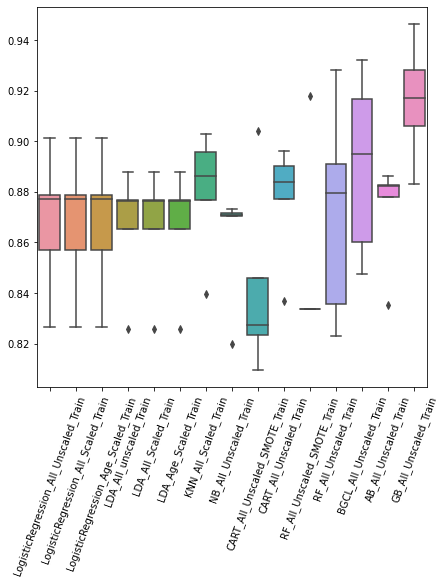

In [187]:
plt.figure(figsize=(7,7))
plt.xticks(rotation=70)
sns.boxplot(data=df.T[0:30:2].T)

In [188]:
plt.figure(figsize=(7,7))
sns.lineplot(data=df.T[0:10:2].T)

In [189]:
plt.figure(figsize=(7,7))
sns.lineplot(data=df.T[10:20:2].T,legend='brief')

In [190]:
plt.figure(figsize=(7,7))
sns.lineplot(data=df.T[20:30:2].T)

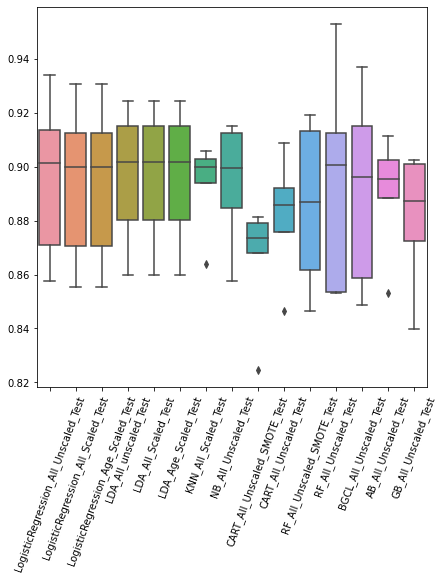

In [191]:
plt.figure(figsize=(7,7))
plt.xticks(rotation=70)
sns.boxplot(data=df.T[1:30:2].T)

In [192]:
plt.figure(figsize=(7,7))
sns.lineplot(data=df.T[1:10:2].T)

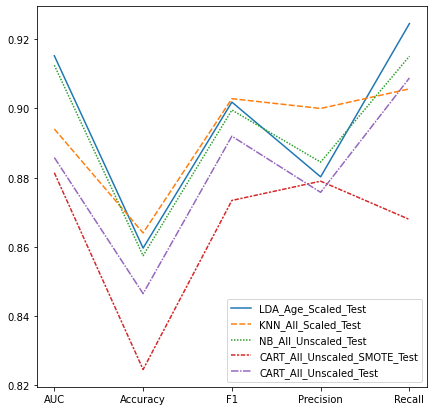

In [193]:
plt.figure(figsize=(7,7))
sns.lineplot(data=df.T[11:20:2].T)

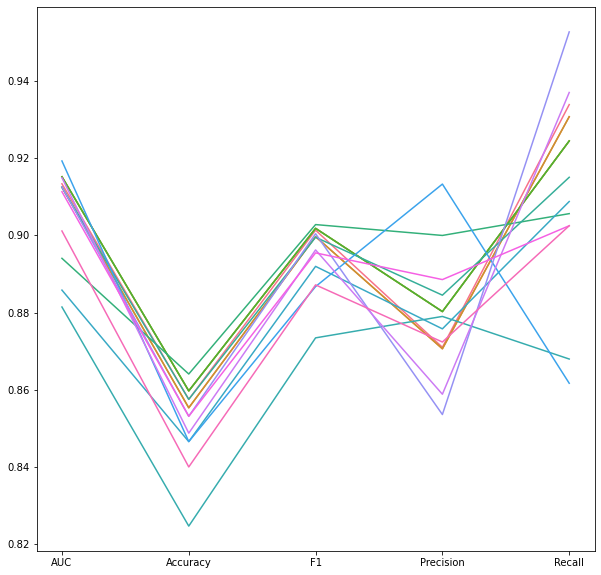

In [194]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df.T[1:30:2].T,dashes=False,legend=0)

# Problem - 2

In [195]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
roosevelt=inaugural.raw('1941-Roosevelt.txt')
kennedy=inaugural.raw('1961-Kennedy.txt')
nixon=inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to C:\Users\my
[nltk_data]     pc\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [196]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [197]:
inaugural.fileids().index('1941-Roosevelt.txt')

38

In [198]:
inaugural.fileids().index('1961-Kennedy.txt')

43

In [199]:
inaugural.fileids().index('1973-Nixon.txt')

46

In [200]:
len(inaugural.fileids())

58

In [201]:
#Roosevelt 1941
inaugural.words(inaugural.fileids()[38])

['On', 'each', 'national', 'day', 'of', 'inauguration', ...]

## Number of Sentences

### Roosevelt

In [202]:
len(inaugural.sents(inaugural.fileids()[38]))

68

In [203]:
#Roosevelt
from nltk.tokenize import sent_tokenize
text=roosevelt
tokenized_text=sent_tokenize(text)
print(len(tokenized_text))

68


### Kennedy

In [204]:
len(inaugural.sents(inaugural.fileids()[43]))

52

In [205]:
#kennedy
from nltk.tokenize import sent_tokenize
text=kennedy
tokenized_text=sent_tokenize(text)
print(len(tokenized_text))

52


### Nixon

In [206]:
len(inaugural.sents(inaugural.fileids()[46]))

69

In [207]:
#nixon
from nltk.tokenize import sent_tokenize
text=nixon
tokenized_text=sent_tokenize(text)
print(len(tokenized_text))

68


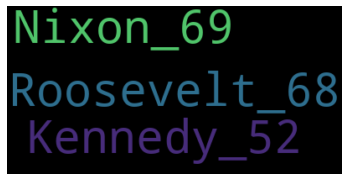

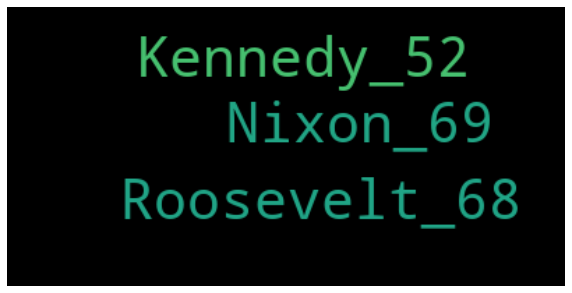

In [239]:
import os

from os import path
from wordcloud import WordCloud

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = open(path.join(d, 'sampleWords.txt')).read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# The pil way (if you don't have matplotlib)
# image = wordcloud.to_image()
# image.show()

## Number of Words

### Roosevelt

In [208]:
#Roosevelt
len(inaugural.words(inaugural.fileids()[38]))

1536

In [209]:
from nltk.tokenize import word_tokenize
text=roosevelt
tokenized_word=word_tokenize(text)
print(len(tokenized_word))

1526


In [210]:
import string
all_words_clean = [word for word in tokenized_word if word not in string.punctuation]

In [211]:
len(all_words_clean)

1375

### Kennedy

In [212]:
#Kennedy
len(inaugural.words(inaugural.fileids()[43]))

1546

In [213]:
from nltk.tokenize import word_tokenize
text=kennedy
tokenized_word=word_tokenize(text)
print(len(tokenized_word))

1543


In [214]:
import string
all_words_clean = [word for word in tokenized_word if word not in string.punctuation]

In [215]:
len(all_words_clean)

1402

### Nixon

In [216]:
#Nixon
len(inaugural.words(inaugural.fileids()[46]))

2028

In [217]:
from nltk.tokenize import word_tokenize
text=nixon
tokenized_word=word_tokenize(text)
print(len(tokenized_word))

2006


In [218]:
import string
all_words_clean = [word for word in tokenized_word if word not in string.punctuation]

In [219]:
len(all_words_clean)

1836

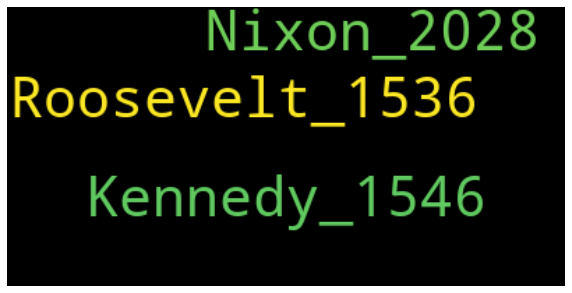

In [240]:
import os

from os import path
from wordcloud import WordCloud

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = open(path.join(d, 'sampleWords.txt')).read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# The pil way (if you don't have matplotlib)
# image = wordcloud.to_image()
# image.show()

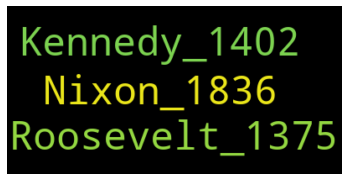

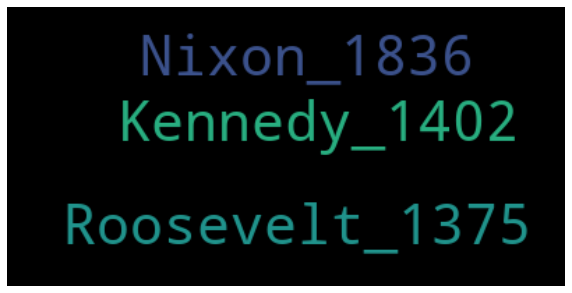

In [243]:
import os

from os import path
from wordcloud import WordCloud

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = open(path.join(d, 'sampleWords.txt')).read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# The pil way (if you don't have matplotlib)
# image = wordcloud.to_image()
# image.show()

## Number of Characters

### Roosevelt

In [220]:
len(inaugural.raw(inaugural.fileids()[38]))

7571

### Kennedy

In [221]:
len(inaugural.raw(inaugural.fileids()[43]))

7618

### Nixon

In [222]:
len(inaugural.raw(inaugural.fileids()[46]))

9991

In [242]:
import os

from os import path
from wordcloud import WordCloud

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = open(path.join(d, 'sampleWords.txt')).read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# The pil way (if you don't have matplotlib)
# image = wordcloud.to_image()
# image.show()

## Removing Stop Words

In [223]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)

In [224]:
# We can see "--" occuring many times in speech,
# while this is not a word, it is also not present in stopwords by default, hence adding the same
stopwords.append("--")
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### Roosevelt

In [225]:
all_words = (w.lower() for w in inaugural.words(inaugural.fileids()[38]))
all_words_clean_roosevelt = [word for word in all_words if word not in stopwords]
all_words_clean_roosevelt

['national',
 'day',
 'inauguration',
 'since',
 '1789',
 'people',
 'renewed',
 'sense',
 'dedication',
 'united',
 'states',
 'washington',
 'day',
 'task',
 'people',
 'create',
 'weld',
 'together',
 'nation',
 'lincoln',
 'day',
 'task',
 'people',
 'preserve',
 'nation',
 'disruption',
 'within',
 'day',
 'task',
 'people',
 'save',
 'nation',
 'institutions',
 'disruption',
 'without',
 'us',
 'come',
 'time',
 'midst',
 'swift',
 'happenings',
 'pause',
 'moment',
 'take',
 'stock',
 'recall',
 'place',
 'history',
 'rediscover',
 'may',
 'risk',
 'real',
 'peril',
 'inaction',
 'lives',
 'nations',
 'determined',
 'count',
 'years',
 'lifetime',
 'human',
 'spirit',
 'life',
 'man',
 'three',
 'score',
 'years',
 'ten',
 'little',
 'little',
 'less',
 'life',
 'nation',
 'fullness',
 'measure',
 'live',
 'men',
 'doubt',
 'men',
 'believe',
 'democracy',
 'form',
 'government',
 'frame',
 'life',
 'limited',
 'measured',
 'kind',
 'mystical',
 'artificial',
 'fate',
 'unexplai

In [226]:
len(all_words_clean_roosevelt)

632

### Kennedy

In [227]:
all_words = (w.lower() for w in inaugural.words(inaugural.fileids()[43]))
all_words_clean_kennedy = [word for word in all_words if word not in stopwords]
all_words_clean_kennedy

['vice',
 'president',
 'johnson',
 'mr',
 'speaker',
 'mr',
 'chief',
 'justice',
 'president',
 'eisenhower',
 'vice',
 'president',
 'nixon',
 'president',
 'truman',
 'reverend',
 'clergy',
 'fellow',
 'citizens',
 'observe',
 'today',
 'victory',
 'party',
 'celebration',
 'freedom',
 'symbolizing',
 'end',
 'well',
 'beginning',
 'signifying',
 'renewal',
 'well',
 'change',
 'sworn',
 'almighty',
 'god',
 'solemn',
 'oath',
 'forebears',
 'l',
 'prescribed',
 'nearly',
 'century',
 'three',
 'quarters',
 'ago',
 'world',
 'different',
 'man',
 'holds',
 'mortal',
 'hands',
 'power',
 'abolish',
 'forms',
 'human',
 'poverty',
 'forms',
 'human',
 'life',
 'yet',
 'revolutionary',
 'beliefs',
 'forebears',
 'fought',
 'still',
 'issue',
 'around',
 'globe',
 'belief',
 'rights',
 'man',
 'come',
 'generosity',
 'state',
 'hand',
 'god',
 'dare',
 'forget',
 'today',
 'heirs',
 'first',
 'revolution',
 'let',
 'word',
 'go',
 'forth',
 'time',
 'place',
 'friend',
 'foe',
 'alike'

In [228]:
len(all_words_clean_kennedy)

697

### Nixon

In [229]:
all_words = (w.lower() for w in inaugural.words(inaugural.fileids()[46]))
all_words_clean_nixon = [word for word in all_words if word not in stopwords]
all_words_clean_nixon

['mr',
 'vice',
 'president',
 'mr',
 'speaker',
 'mr',
 'chief',
 'justice',
 'senator',
 'cook',
 'mrs',
 'eisenhower',
 'fellow',
 'citizens',
 'great',
 'good',
 'country',
 'share',
 'together',
 'met',
 'four',
 'years',
 'ago',
 'america',
 'bleak',
 'spirit',
 'depressed',
 'prospect',
 'seemingly',
 'endless',
 'war',
 'abroad',
 'destructive',
 'conflict',
 'home',
 'meet',
 'today',
 'stand',
 'threshold',
 'new',
 'era',
 'peace',
 'world',
 'central',
 'question',
 'us',
 'shall',
 'use',
 'peace',
 'let',
 'us',
 'resolve',
 'era',
 'enter',
 'postwar',
 'periods',
 'often',
 'time',
 'retreat',
 'isolation',
 'leads',
 'stagnation',
 'home',
 'invites',
 'new',
 'danger',
 'abroad',
 'let',
 'us',
 'resolve',
 'become',
 'time',
 'great',
 'responsibilities',
 'greatly',
 'borne',
 'renew',
 'spirit',
 'promise',
 'america',
 'enter',
 'third',
 'century',
 'nation',
 'past',
 'year',
 'saw',
 'far',
 'reaching',
 'results',
 'new',
 'policies',
 'peace',
 'continuing',


In [230]:
len(all_words_clean_nixon)

836

## Words that occurs most number of times

### Roosevelt

In [231]:
nltk.FreqDist(all_words_clean_roosevelt).most_common(3)

[('nation', 12), ('know', 10), ('spirit', 9)]

### kennedy

In [232]:
nltk.FreqDist(all_words_clean_kennedy).most_common(3)

[('let', 16), ('us', 12), ('world', 8)]

### Nixon

In [233]:
nltk.FreqDist(all_words_clean_nixon).most_common(3)

[('us', 26), ('let', 22), ('america', 21)]

## Word Clouds

### Roosevelt

In [246]:
wordcloud_roosevelt = WordCloud(stopwords=stopwords,
                      width=3000,
                      height=2500
                     ).generate(str(all_words_clean_roosevelt))
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud_roosevelt)
plt.axis('off')
plt.figtext(.5,.9,'Roosevelt', fontsize=50, ha='center')
plt.show()

## Kennedy

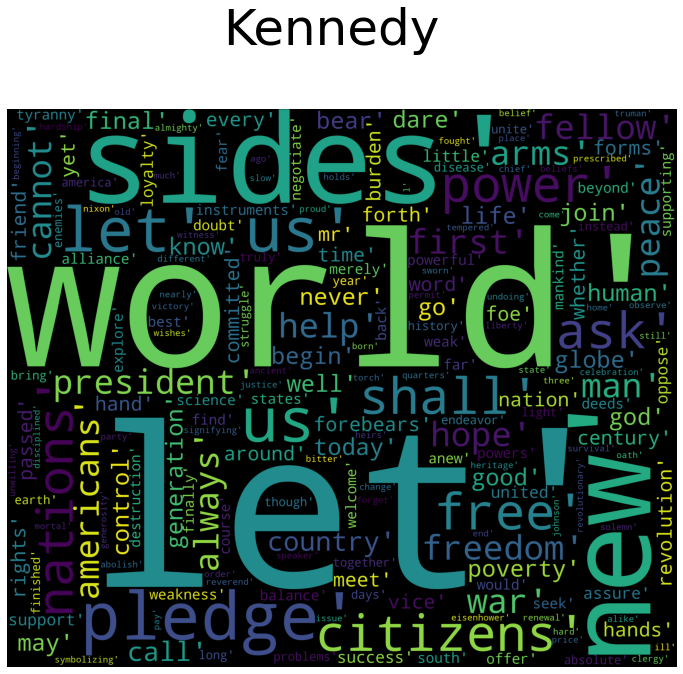

In [247]:
wordcloud_kennedy = WordCloud(stopwords=stopwords,
                      width=3000,
                      height=2500
                     ).generate(str(all_words_clean_kennedy))
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud_kennedy)
plt.figtext(.5,.9,'Kennedy', fontsize=50, ha='center')
plt.axis('off')
plt.show()

## Nixon

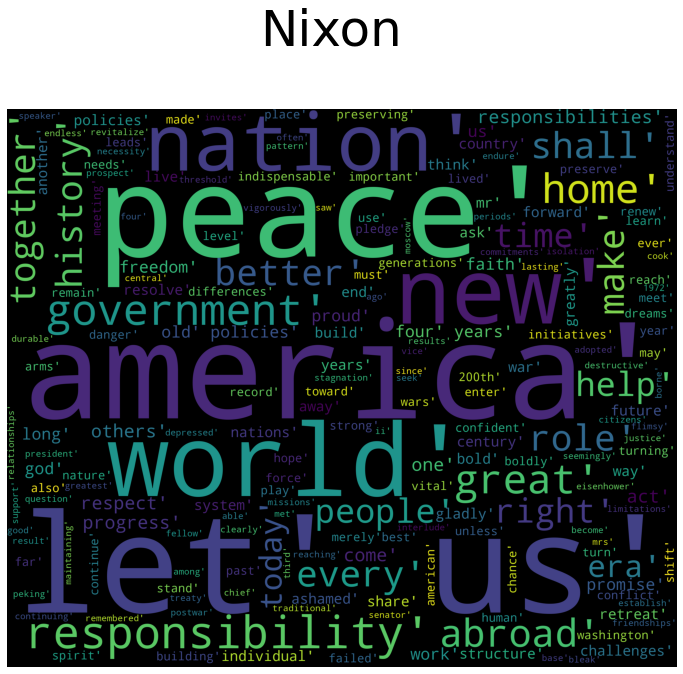

In [248]:
wordcloud_nixon = WordCloud(stopwords=stopwords,
                      width=3000,
                      height=2500
                     ).generate(str(all_words_clean_nixon))
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud_nixon)
plt.figtext(.5,.9,'Nixon', fontsize=50, ha='center')
plt.axis('off')
plt.show()

#  Thank You!!